# Analisis Exploratorio de Datos

El dataset está compuesto por tres tablas relacionadas. La primera, `productos_df`, contiene registros de productos por orden, con las columnas `order_id` y `product_name_hash`.Cada fila representa un producto específico incluido en una orden. La segunda, `ordenes_df`, tiene información detallada sobre cada orden, como el identificador de la orden (`order_id`), el día y la hora en que se realizó, el `vendor_id`, el `user_id`, el monto total (`total_amount`) y si tuvo descuento (`has_discount`). La tercera tabla, `embeddings_df`, vincula cada `product_name_hash` con dos niveles jerárquicos (`level_one_hash` y `level_two_hash`) y un vector embebido en forma de string (`emb_str`). Las relaciones clave son: `productos_df` puede unirse con ordenes_df mediante `order_id` para obtener el contexto de la compra, y con `embeddings_df` mediante `product_name_hash` para obtener información del producto.

Este informe presenta un análisis exploratorio del dataset de PedidosYa Supermarket. El propósito es comprender la estructura de los datos, identificar patrones preliminares y preparar la información para una posterior segmentación de tipos de compras

In [1]:
# --- Manejo de datos ---
import pandas as pd              # Manipulación de tablas y estructuras tipo DataFrame
import numpy as np               # Operaciones vectorizadas, arrays y funciones numéricas

# --- Visualización ---
import matplotlib.pyplot as plt  # Visualización básica y control de figuras
import seaborn as sns            # Gráficos estadísticos con estilos integrados
from matplotlib.ticker import FuncFormatter  # Formateo personalizado de ejes numéricos

# --- Visualización interactiva (Jupyter) ---
from IPython.display import display          # Visualización enriquecida de objetos en Jupyter

# --- Preprocesamiento y reducción de dimensionalidad ---
from sklearn.decomposition import PCA        # Análisis de componentes principales
from sklearn.manifold import TSNE            # t-SNE para proyecciones no lineales en 2D

# --- Clusterización ---
from sklearn.cluster import KMeans           # Algoritmo de clustering basado en centroides

# --- Análisis de distancias ---
from scipy.spatial.distance import pdist     # Cálculo de distancias pares entre vectores

# --- Utilidades generales ---
import string                                # Manejo de caracteres y manipulación de texto
import json                                  # Lectura/escritura de archivos en formato JSON
from itertools import combinations           # Generación de combinaciones entre elementos
from collections import Counter              # Conteo eficiente de elementos en listas o arrays

import matplotlib.pyplot as plt

plt.rcParams.update({
    'axes.titlesize': 16,       # Tamaño del título del gráfico
    'axes.labelsize': 14,       # Tamaño de los labels de los ejes
    'xtick.labelsize': 12,      # Tamaño de los ticks del eje X
    'ytick.labelsize': 12,      # Tamaño de los ticks del eje Y
    'legend.fontsize': 12,      # Tamaño del texto en la leyenda
    'figure.titlesize': 18      # Tamaño del título de toda la figura (si usás plt.suptitle)
})



In [2]:
Flag = False  # Variable para controlar la ejecución de ciertas secciones del código

## Carga de datos

In [3]:
productos_ordenes = pd.read_csv('productos_orders_peya.csv')
ordenes = pd.read_csv('ordenes_caso_peya.csv')
productos_embeddings = pd.read_csv('productos_embeddings_peya.csv')

productos_ordenes_df = productos_ordenes.copy()
ordenes_df = ordenes.copy()
productos_embeddings_df = productos_embeddings.copy()

## Descripcion general de los datos

### productos_ordenes_df

In [4]:
df = productos_ordenes_df
print(f'El tamaño de la tabla es {df.shape}','\n')
print(df.info(),'\n')
display(df.head())
print('\n')
display(df.describe(include='all'))


El tamaño de la tabla es (2841432, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841432 entries, 0 to 2841431
Data columns (total 2 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           object
 1   product_name_hash  object
dtypes: object(2)
memory usage: 43.4+ MB
None 



,order_id,product_name_hash
0,a+Zu10VZtZEk2JZjSCD3wxCBstKfnCf1DtXL+uBkl7k=,SnvJTvCcoPPIdmOEswzfGXsmaFKDG9w2F+UDHYPDkiQ=
1,CVeVkk9/F6AR0Rfoun+0VWpFBYz3ZmV996qI0sh43go=,yX2bGrgqIVWuOcHn1Newj7LEUEFK+0kXzw99I3Gk250=
2,e0a0MaHOAzHxHcgX125ksEsNjOdW3UbzlSz6n3cBlrk=,uk3gGhc+Qlsx/znUu/RMrPRp3SzBhc+te6tFNcc5ccc=
3,7hLsxhcbGDPtfvJQXQVxhzuez5lqZ9yNaCYPumnPZX8=,dsSOOlAYf0rMVRrNDLeRBXzcq6wRqNkrKHMee2DQvTI=
4,sK+4S57GixqJNh/n0d3bPVIlPjEQQyb0Hv6rHrlCb4g=,Lp59PRC3/O93VjfHL8LfmVRUT6XmPdmD1opw842GNpA=


,order_id,product_name_hash
count,2841432,2841313
unique,500000,41020
top,qF9VQtPGbT9DDY/vVZ9pfmrHdaycrS+nN0Z5V51BP50=,SoYYapSvpsllW/s5BHwZgHzPCl//QdphGZ5icIE9U70=
freq,110,25175


Tenemos 500000 ordenes unicas y 41020 productos unicos. Hay ordenes que tienen varios productos. Cada una de las lineas representa una combinacion de orden y producto.

In [5]:
# Analizamos valores nulos
print(productos_ordenes_df.isnull().sum())
ordenes_sin_producto = productos_ordenes_df[productos_ordenes_df.isnull().any(axis=1)]
display(ordenes_sin_producto)

display(ordenes_sin_producto.describe(include='all'))

display(ordenes_df[ordenes_df['order_id'].isin(ordenes_sin_producto['order_id'].values)])
display(ordenes_df[ordenes_df['order_id'].isin(ordenes_sin_producto['order_id'].values)].describe(include='all'))

order_id               0
product_name_hash    119
dtype: int64


,order_id,product_name_hash
2101,326JKdVDc712mScEAPuJKWRwYI9rhNegORueiLlmrH8=,NaN
12288,/PY2+a/ycr7z/eeor+3CXZFcKgXIUS4cuhMqP2VgfB0=,NaN
32733,IBWFl2VbdKzpC2HolrvVGrCSi0d0OzS59xWbVdn13tA=,NaN
125027,awbbdrhs2bmaEVtt9mGpVj1XF4z+m4EzuwedC11roWc=,NaN
127285,GYbIvCwWmC/6BFF/XkR9Kk2qCKX5Z2aWWJgeNHzkbOM=,NaN
...,...,...
2762119,MXN/yw6+AfFVGEgoU1lDzvgELgLnEy6tryzqt4n639Y=,NaN
2788065,jIX9fBjD1UNIjEybk+0ZrwpTBWdRT7t21VAg9QXWWK0=,NaN
2798622,CF0Tq0P2DOuQ+KzjRdnzJPD+evL7mXWYE9itYXd9OiQ=,NaN
2807185,uzNAMdLtLuVoP8uNAXo+PNEtL8OLfLRWh2oEeUgQU8U=,NaN


,order_id,product_name_hash
count,119,0
unique,119,0
top,326JKdVDc712mScEAPuJKWRwYI9rhNegORueiLlmrH8=,NaN
freq,1,NaN


,order_id,weekday,hour,vendor_id,user_id,total_amount,has_discount
1613,Cg4bRBnoyODbqiHce9P3Hw3qUhEAExG4iUXBOU34sUA=,Wednesday,23,mQVNcHCJgvqE82YpiFfo41ZEttYO8ymkAkOrOx4zPRQ=,gDLiyXoan/YkNqLhwALHf3kVa++OqO9xhIyM33eyCdU=,15.861686,False
4998,zFSHJaB7MW8Vf+msRYT1Ufrt0pqdsiliMycWOYyWV0A=,Wednesday,22,Xs8GOBqLzZq4pxBfsM4k9xWxRxb8fs7be3L9N4OndLI=,t9HL/dT8Tcm5SveHXMX4K4fiwyLll2JUpnYPGDF/fHc=,39.650250,False
7082,E6f95Q97+XLYqPIche+oNZXw1WJRar9ByD97C4cJ8iw=,Wednesday,22,r4EP/ytOyxSElZmhYIWcN37Kce8xZQ6RWvON2Q54yDs=,LnJSERAyHFOv8ZaZXImkOTb//j5S/+T9ATRWcBwhU1U=,23.792529,True
9221,nUsuyfcwSsGGxjuLLrFIPDxCQ59z12lNfj2jSpkrALA=,Wednesday,21,DmXMf8hey5Q6VFNrx3R6sPQp/4tjbuj9f4+X6zuXX7M=,HC1ZQ3+C9P9qR8s8vj2EhCP1o26YLDo3uvSEg//j9cw=,35.688794,False
13348,Hp87l7EQAaCnPny+S86MlJzvxmHRSvmgyCJROW7xJB0=,Wednesday,21,ka3vQu6W9twkkcGdo8OI8OduP1Yc3FDEfNCupcrQ0LU=,LHzXdDVER0jAeHwQ3vm2LzhrvtKTlgMLKLFmUJ2Oc90=,26.358097,True
...,...,...,...,...,...,...,...
473044,W35jdvuEDexnbg/SL+u4zmt5bWo5dbi6fg2zbUEKDdk=,Wednesday,19,CAAKZMHJjouBxWvO8Ys3kHHmfhnI1xDubgk0Ee12xUY=,nR0xDajRb43JAcyCRyiqytgSMU77vG+BQnzcjNq8MEg=,12.134190,True
473903,R/hAMRGLvIQ+OlPurW76sYSSKmiKGunsrwcQTQOOQsM=,Wednesday,19,f1NY+3v5w0h70yNQCTRvR3+jIWf/1sYVxWCBIRrUBuY=,m90AJlbwWTU6Ck+35YiwnoNsPV+GMzq4QK+awJbgxGc=,21.611547,True
476192,YdB7xz3Y0wJ97q1OLGyvl2fO9lDHof4D/FIxqYKsC+c=,Wednesday,19,OM20KnoxhAgxuuuYPFouKw20tKfwC2GAF054vRFUUEs=,CoKGdkaeq8asO97+y6hApVFxtm4ayfL0ndQwr4Rwhdg=,23.929832,False
486794,pn9ssjadBUAXb4KdNLuvAxN2V8JFV70s3ossL2YfAEM=,Wednesday,18,+/hk4s9p82cGPLK5IsMeL6FDapj4LeFLikpJHuR8cm8=,bB7m+K4JVll8r7Lw2ZQFvHjEMe/H7qD9Vc4oMyoQHJk=,19.628837,True


,order_id,weekday,hour,vendor_id,user_id,total_amount,has_discount
count,119,119,119.000000,119,119,119.000000,119
unique,119,7,NaN,38,115,NaN,2
top,Cg4bRBnoyODbqiHce9P3Hw3qUhEAExG4iUXBOU34sUA=,Wednesday,NaN,DmXMf8hey5Q6VFNrx3R6sPQp/4tjbuj9f4+X6zuXX7M=,n9AYzVnSv3YX1yqEC2aYsJxr1viNT9fwIyqmHaecBUs=,NaN,False
freq,1,23,NaN,20,2,NaN,77
mean,NaN,NaN,18.042017,NaN,NaN,23.128723,NaN
std,NaN,NaN,4.674842,NaN,NaN,12.596737,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,13.878975,NaN
50%,NaN,NaN,20.000000,NaN,NaN,20.818463,NaN
75%,NaN,NaN,22.000000,NaN,NaN,28.708660,NaN


Tenemos 119 filas sin registro en el producto. Dado que son una cantidad baja en el total podemos optar por eliminar estos registros. Podriamos tambien estudiar que esta pasando con estos registros, que otra informacion tienen.

In [6]:
ordenes_con_nulos = productos_ordenes_df[productos_ordenes_df.isnull().any(axis=1)]['order_id'].unique()
ordenes_df = ordenes_df[~ordenes_df['order_id'].isin(ordenes_con_nulos)].reset_index(drop=True)

productos_ordenes_df = productos_ordenes_df.dropna().reset_index(drop=True)
display(productos_ordenes_df[productos_ordenes_df.isnull().any(axis=1)])
print(productos_ordenes_df.shape, ordenes_df.shape)

,order_id,product_name_hash


(2841313, 2) (499881, 7)


,order_id,cant_prod_por_ped
423466,qF9VQtPGbT9DDY/vVZ9pfmrHdaycrS+nN0Z5V51BP50=,110
485074,y4lfwFHmOF4xCLa078UfgwRt5/gtF6/GDtqqbEDZhHc=,95
78531,85b6FQDu91sCmoMHaRAIJ1cIklt5jkNzs/27DCcwWMA=,93
356588,hi81x03GIRQCQTruQ2U+ETd3aNVjnEB5X8R6xuBwsi0=,89
336274,f4FTHRdd6CFwgXfSIwo1MystqSRNP5QY9H6zjnwcbLc=,84
...,...,...
249487,U/doFfwU3JCFDMO9vtCHdzTAwqXbxP3F9fYmwjfeZik=,1
81109,8QgTPaZOAymZhksUD9o9M2YAXro5qvlvt8MrlYSeiog=,1
429766,r3CYJFdtf8PLQaXh1ic/fcSSAAIeVMXJx5Zutf5Kb8s=,1
97886,AZSXw9PIU+l+PyKLOrfr8mbEKmjyHGSRzfhgrCb46s0=,1


,cant_prod_por_ped
count,499881.000000
mean,5.683979
std,4.757574
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,110.000000


(499881, 2)


Text(0, 0.5, 'Cantidad de productos')

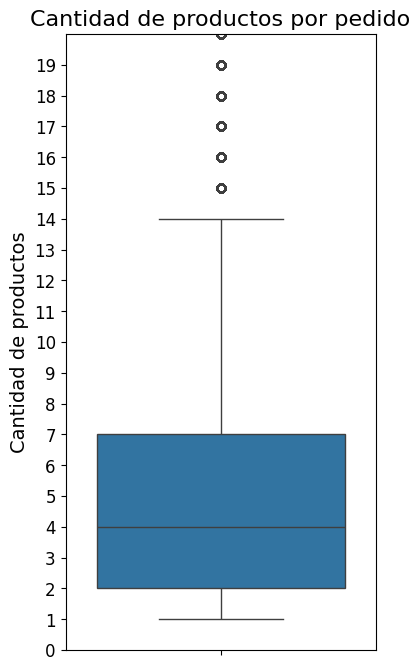

In [7]:
# Analicemos la cantidad de productos por orden

num_ped_orden = (
    productos_ordenes_df
    .groupby('order_id')['product_name_hash']
    .count()
    .reset_index()
    .rename(columns={'product_name_hash': 'cant_prod_por_ped'})
    .sort_values('cant_prod_por_ped', ascending=False)
)

display(num_ped_orden)

display(num_ped_orden.describe())
valor = 1000
condicion = num_ped_orden['cant_prod_por_ped'] < valor
print(num_ped_orden[condicion].shape)
plt.figure(figsize=(4,8))
sns.boxplot(data = num_ped_orden[condicion], y = 'cant_prod_por_ped')
plt.ylim(0,20)
plt.yticks(range(0,20))
plt.title('Cantidad de productos por pedido')
plt.ylabel('Cantidad de productos')

Tenemos que la orden con mayor cantidad de productos es de 110. La media de productos por pedido es de 4.80 productos.

In [8]:
# Upper bound = Q3 + 1.5 * IQR = 7 + 1.5 * 5 = 7 + 7.5 = 14.5
num_outliers = len(num_ped_orden[num_ped_orden['cant_prod_por_ped'] > 15])
total_ordenes = len(num_ped_orden)
print(f"Número de outliers (> 15 productos): {num_outliers} ({num_outliers / total_ordenes * 100:.2f}%)")

Número de outliers (> 15 productos): 21160 (4.23%)


### ordenes_df

In [9]:
df = ordenes_df
print(f'El tamaño de la tabla es {df.shape}','\n')
print(df.info(),'\n')
display(df.head())
print('\n')
display(df.describe(include='all'))

El tamaño de la tabla es (499881, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499881 entries, 0 to 499880
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      499881 non-null  object 
 1   weekday       499881 non-null  object 
 2   hour          499881 non-null  int64  
 3   vendor_id     499881 non-null  object 
 4   user_id       499881 non-null  object 
 5   total_amount  499881 non-null  float64
 6   has_discount  499881 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 23.4+ MB
None 



,order_id,weekday,hour,vendor_id,user_id,total_amount,has_discount
0,WTLFPkLff5bZNrrd/zGYVZVUVIJWQULwkKxzyHll+es=,Wednesday,23,5f+aiGV6xCRCYwHlLaAgBrZpC/7efioVt15FS5o6CO4=,5i1AOyU+jDvqV731fLcst5FiXJh0Y64dnmTyt3TpItg=,25.220081,True
1,+wlDapm5+s/3YhXvvg8Gml4wLyB5TVmgadjbsc4nvTU=,Wednesday,23,mQVNcHCJgvqE82YpiFfo41ZEttYO8ymkAkOrOx4zPRQ=,rJvd4wlp70y8vL+neexrrQ9ne11dpz+D/V1RRienfYA=,52.740106,True
2,sCL893jcK7xYC2WJ1CQKz5HTTbx0i1TsdD0ASfk7hWM=,Wednesday,23,9mD30MnjpoiTVVaH7sAtlYHEkV0iTgUY2y2MTt3+wuQ=,BZsPCkG5WdFVH/hNFc+akbxJI6fgYnRwppurujzClWk=,15.266873,False
3,6E8uOUs9CXBsnqBQNuvfuX3bd00iNU81BkojKEP4JA0=,Wednesday,23,fUIXCZl//WHU5EG7I8l32tk1S4+9Q1S65Ln9UYC3TSI=,noZVQtY9EDetbdCTxW2sM1dLzYcuxmXcx6B6Ed9AUWQ=,34.915537,False
4,WivBfSLH/b6YxbjtCLpEgqvXXXi6ItKB+ZU9ZkMQ/9Y=,Wednesday,23,zAzrkgtS9bkevehjhzsJHnVQJin3r3RXLau2tYqB8rs=,D+7uBtUGMMJEwjLw2dyMdjmcC82Xk8ftRuVZHw6lmH8=,20.223650,False


,order_id,weekday,hour,vendor_id,user_id,total_amount,has_discount
count,499881,499881,499881.000000,499881,499881,499881.000000,499881
unique,499881,7,NaN,2451,306756,NaN,2
top,WTLFPkLff5bZNrrd/zGYVZVUVIJWQULwkKxzyHll+es=,Wednesday,NaN,fcoHAhT5i5JpyKDXm9tzVUmi4s1FXIuS++RHf51+EjQ=,r7sOTstFxhCCelBWbyMW09M5iscVeg94Duaq7saqK8o=,NaN,True
freq,1,115929,NaN,9709,43,NaN,371487
mean,NaN,NaN,16.552357,NaN,NaN,42.774595,NaN
std,NaN,NaN,4.221760,NaN,NaN,35.315129,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,13.000000,NaN,NaN,22.008089,NaN
50%,NaN,NaN,18.000000,NaN,NaN,32.094932,NaN
75%,NaN,NaN,20.000000,NaN,NaN,52.030435,NaN


- Cada una de la filas representa una orden unica
- Tenemos 7 valores en `weekday`, que deberian ser los dias de la semana. El dia que mas se pide son los miercoles
- Deberiamos analizar los valores de `hour` para comprobar que el formato este correcto
- Tenemos 2454 vendors unicos en las 500000 ordenes
- Tenemos 306814 usuarios unicos en las 500000 ordenes
- Deberiamos analizar los valores de `total_amount` para analizar formato y posibles outliers. En promedio las ordenes son de 42 euros, con un minimo de 0 euros y un maximo de 982 euros
- Tenemos 2 valores en `has_discount`, True y False, correspondientes a la presencia o no de descuentos. En general las ordenes SI tienen descuento. 

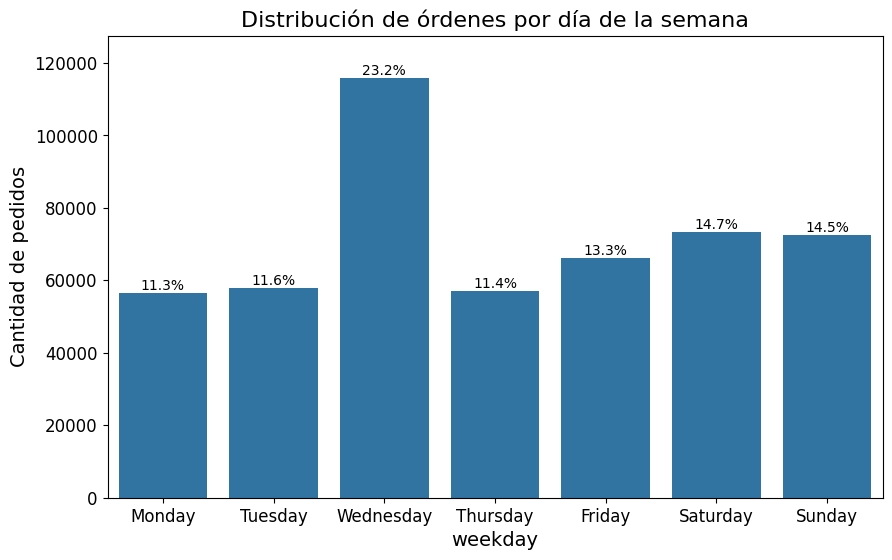

In [10]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

count_dias = ordenes_df['weekday'].value_counts().reindex(days)

pct_dias = ordenes_df['weekday'].value_counts(normalize=True).reindex(days)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=count_dias.index, y=count_dias.values)

plt.title('Distribución de órdenes por día de la semana')
plt.ylabel('Cantidad de pedidos')
plt.ylim(0, max(count_dias.values) * 1.1)

for i, (count, pct) in enumerate(zip(count_dias.values, pct_dias.values)):
    if not pd.isna(count):
        ax.text(i, count + 1, f'{pct:.1%}', ha='center', va='bottom')

plt.show()

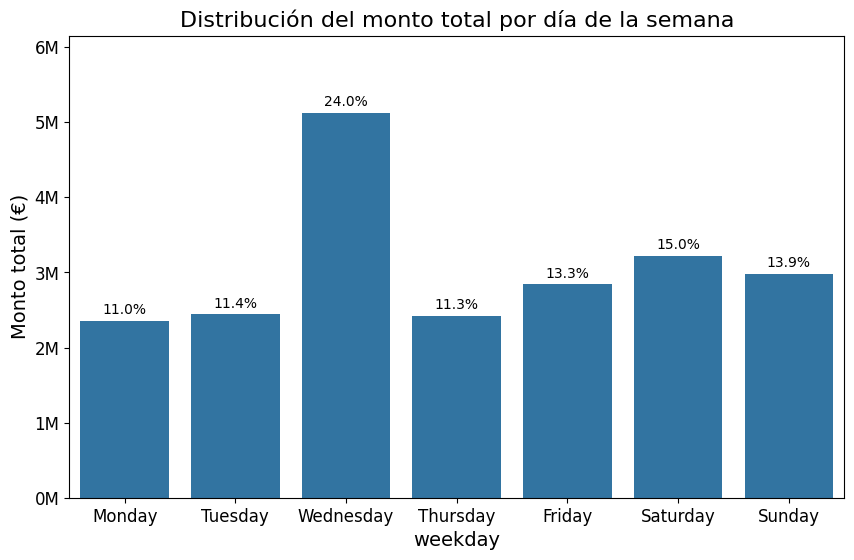

In [11]:
# Se define orden de días
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Suma total_amount por día
total_por_dia = ordenes_df.groupby('weekday')['total_amount'].sum().reindex(days)

# Se calcula proporción del total de dinero por día
total_general = total_por_dia.sum()
pct_por_dia = total_por_dia / total_general

# Gráfica
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_por_dia.index, y=total_por_dia.values)

plt.title('Distribución del monto total por día de la semana')
plt.ylabel('Monto total (€)')
plt.ylim(0, total_por_dia.max() * 1.2)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000000:.0f}M'))

for i, (monto, pct) in enumerate(zip(total_por_dia.values, pct_por_dia.values)):
    if not pd.isna(monto):
        ax.text(i, monto + total_por_dia.max() * 0.01, f'{pct:.1%}', ha='center', va='bottom')

plt.show()

Efectivamente `weekday` tiene los dias de la semana, de Lunes a Domingo. Los dias que mas ordenes hay en dataset son los miercoles, seguido del sabado y domingo.

In [12]:
display(ordenes_df['has_discount'].value_counts(normalize=1))

has_discount
True     0.743151
False    0.256849
Name: proportion, dtype: float64

Casi el 75% de las ordenes tienen algun tipo de descuento aplicado

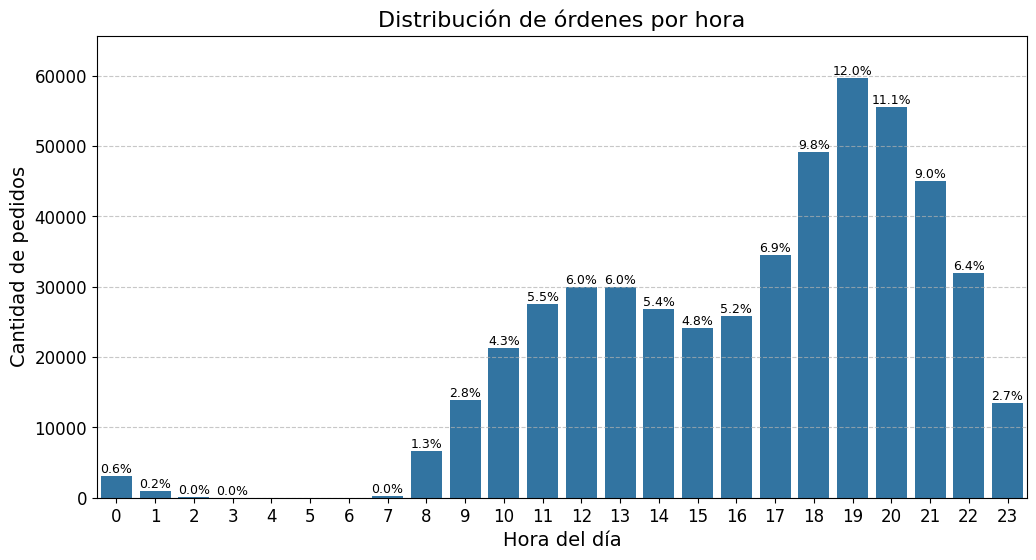

In [13]:
rango_horas = pd.Index(range(24))

conteo_horas = ordenes_df['hour'].value_counts().sort_index().reindex(rango_horas, fill_value=0)
frecuencia_horas = ordenes_df['hour'].value_counts(normalize=True).sort_index().reindex(rango_horas, fill_value=0)

df_horas = pd.DataFrame({
    'hour': conteo_horas.index,
    'count': conteo_horas.values,
    'pct': frecuencia_horas.values
})

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_horas, x='hour', y='count')

plt.title('Distribución de órdenes por hora')
plt.ylabel('Cantidad de pedidos')
plt.xlabel('Hora del día')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(24))  # De 0 a 23
plt.ylim(0, df_horas['count'].max() * 1.1)

for i, row in df_horas.iterrows():
    if row['count'] > 0:
        ax.text(i, row['count'] + 1, f"{row['pct']:.1%}", ha='center', va='bottom', fontsize=9)

plt.show()

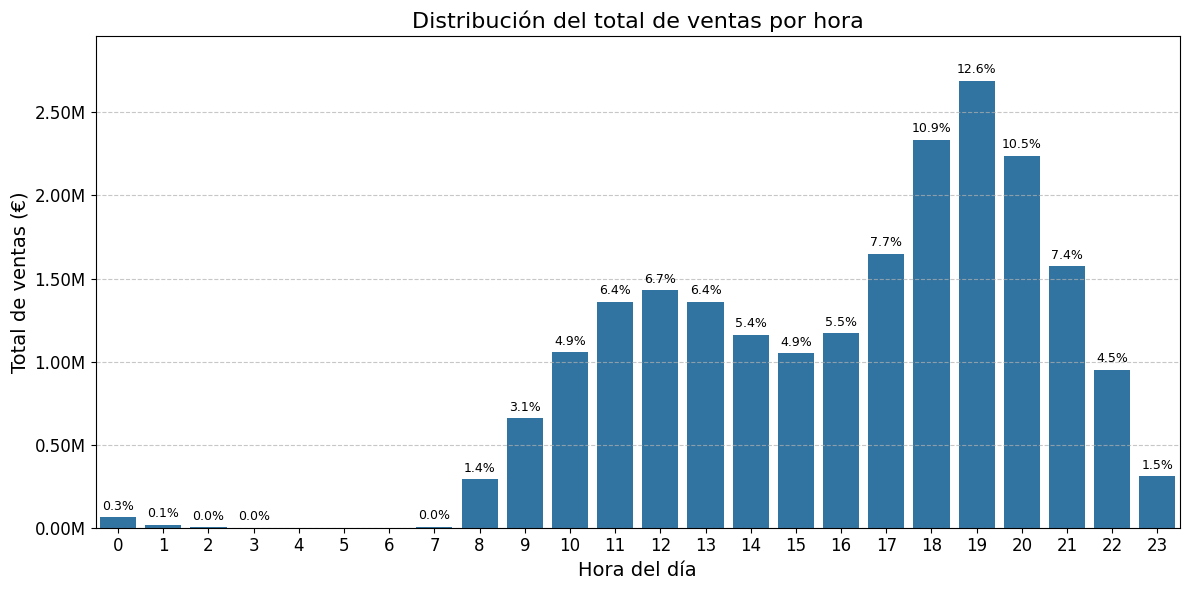

In [14]:
ordenes_df['hour'] = ordenes_df['hour'].astype(int)

rango_horas = pd.Index(range(24))

suma_total = ordenes_df.groupby('hour')['total_amount'].sum().reindex(rango_horas, fill_value=0)

porcentaje_total = suma_total / suma_total.sum()

df_horas = pd.DataFrame({
    'hour': suma_total.index,
    'total_amount': suma_total.values,
    'pct': porcentaje_total.values
})

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_horas, x='hour', y='total_amount')

plt.title('Distribución del total de ventas por hora')
plt.ylabel('Total de ventas (€)')
plt.xlabel('Hora del día')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.ylim(0, df_horas['total_amount'].max() * 1.1)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000000:.2f}M'))

for i, row in df_horas.iterrows():
    if row['total_amount'] > 0:
        ax.text(i, row['total_amount'] + df_horas['total_amount'].max() * 0.01, 
                f"{row['pct']:.1%}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Se observa que entre la 1 de la mañana y las 7 de la mañana practicamente no hay pedidos. Luego tenemos un primer aumento de pedidos hasta la hora 13, un descenso en las horas 14 y 15, y un maximo de pedidos en la hora 19.

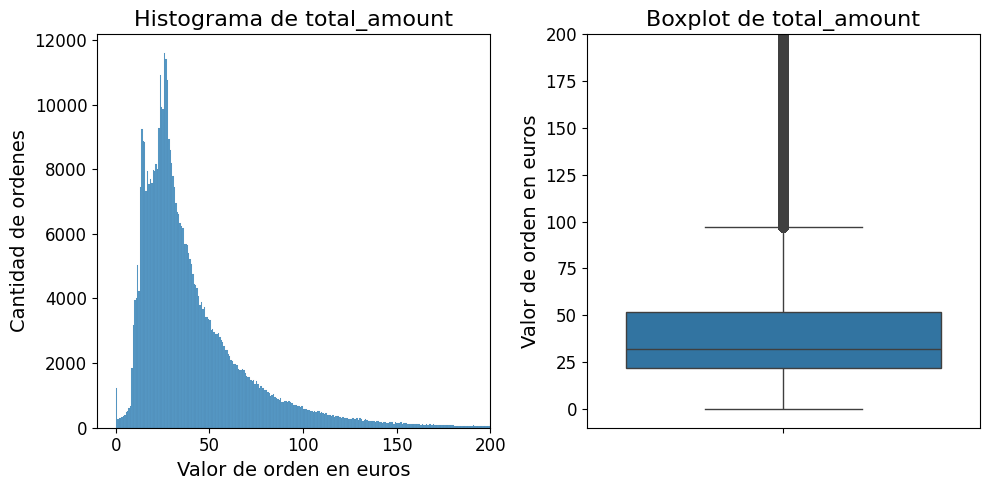

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

# Histograma
sns.histplot(data=ordenes_df, x='total_amount', ax=axes[0])
axes[0].set_title('Histograma de total_amount')
axes[0].set_xlabel('Valor de orden en euros')
axes[0].set_ylabel('Cantidad de ordenes')
axes[0].set_xlim(-10,200)

# Boxplot
sns.boxplot(data=ordenes_df, y='total_amount', ax=axes[1])
axes[1].set_title('Boxplot de total_amount')
axes[1].set_ylabel('Valor de orden en euros')
axes[1].set_ylim(-10,200)

plt.tight_layout()
plt.show()

Efectiamente tenemos una concentracion de ordenes en la zona entre 0 y 200 euros, y luego algunos valores sueltos entre 200 y 1000 euros. Tenemos una distribucion sesgada. Debemos analizar que hacer con estos datos.

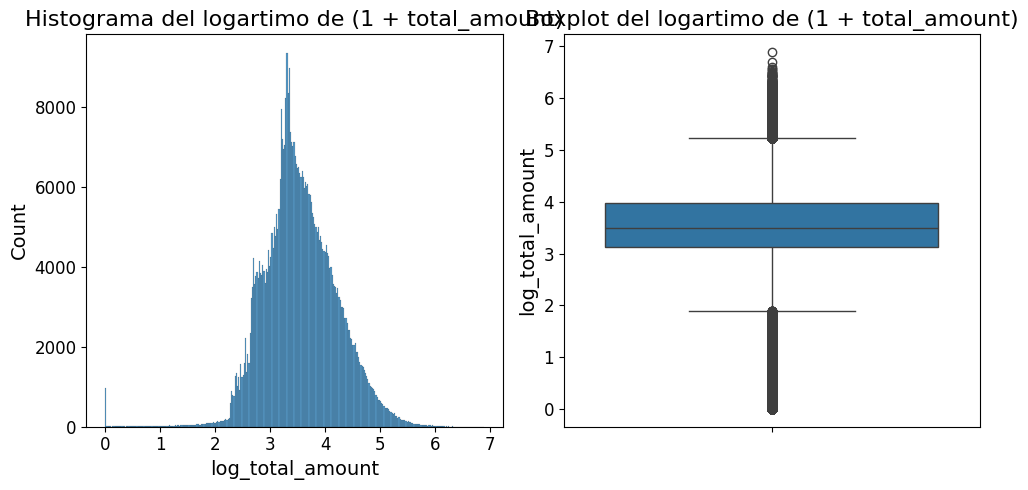

In [16]:
ordenes_log_df = ordenes_df.copy()
ordenes_log_df['log_total_amount'] = np.log1p(ordenes_log_df['total_amount'])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

sns.histplot(data = ordenes_log_df,x = 'log_total_amount',ax=axes[0])
axes[0].set_title('Histograma del logartimo de (1 + total_amount)')

sns.boxplot(data = ordenes_log_df, y = 'log_total_amount',ax=axes[1])
axes[1].set_title('Boxplot del logartimo de (1 + total_amount)')

plt.tight_layout()
plt.show()

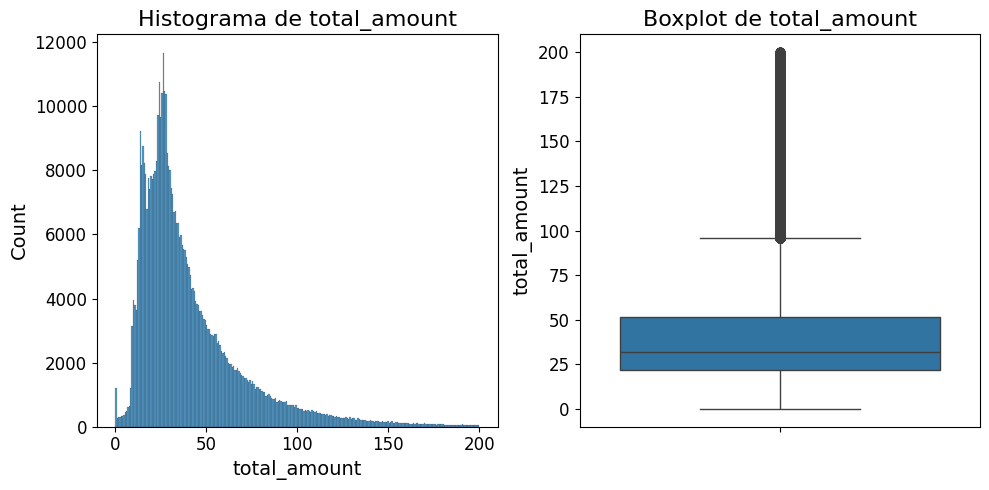



La cantidad de elementos de la tabla filtrada es 496543 en un total de 499881 
 Esto representa el 0.993 de los registros


In [17]:
valor_limite = 200
condicion = ordenes_df['total_amount'] < valor_limite

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

sns.histplot(data = ordenes_df[condicion],x = 'total_amount',ax=axes[0])
axes[0].set_title('Histograma de total_amount')

sns.boxplot(data = ordenes_df[condicion], y = 'total_amount',ax=axes[1])
axes[1].set_title('Boxplot de total_amount')

plt.tight_layout()
plt.show()

print('\n')
total_reg = ordenes_df.shape[0]
filtrado_reg = ordenes_df[condicion].shape[0]
print(f'La cantidad de elementos de la tabla filtrada es {filtrado_reg} en un total de {total_reg}','\n',f'Esto representa el {round(filtrado_reg / total_reg,3)} de los registros')

Al establecer la condicion limite en total amount, obtenemos una mejor distribucion de datos. Dado que los valores atipicos son muy pocos en el total de datos podriamos optar por no tener en cuenta estas ordenes al momento de realizar el analisis.

In [18]:
# Verificar columnas disponibles en ordenes_df
print("Columnas en ordenes_df:", ordenes_df.columns.tolist())

# Calcular cant_prod_por_ped si no está en ordenes_df
num_ped_orden = (
    productos_ordenes_df
    .groupby('order_id')['product_name_hash']
    .count()
    .reset_index()
    .rename(columns={'product_name_hash': 'cant_prod_por_ped'})
)

# Asegurar que order_id tenga el mismo tipo
ordenes_df['order_id'] = ordenes_df['order_id'].astype(str)
num_ped_orden['order_id'] = num_ped_orden['order_id'].astype(str)

# Unir con ordenes_df (crear una copia temporal para no modificar el original aún)
ordenes_df_temp = ordenes_df.merge(num_ped_orden, on='order_id', how='left')

# Verificar que la unión fue exitosa y manejar NaN
print("Columnas después de la unión:", ordenes_df_temp.columns.tolist())
if 'cant_prod_por_ped' not in ordenes_df_temp.columns:
    raise KeyError("La columna cant_prod_por_ped no se agregó correctamente. Revisa los DataFrames.")
if ordenes_df_temp['cant_prod_por_ped'].isna().all():
    raise ValueError("Todos los valores de cant_prod_por_ped son NaN. Revisa la unión o los datos en productos_ordenes_df.")

# Rellenar NaN con 0 (si no hay coincidencia, asumimos 0 productos)
ordenes_df_temp['cant_prod_por_ped'] = ordenes_df_temp['cant_prod_por_ped'].fillna(0)

# Definir umbrales para outliers
max_products = 40
max_amount = 150

# Contar filas originales y filas que se eliminarían
total_ordenes = len(ordenes_df_temp)
ordenes_filtradas = ordenes_df_temp[
    (ordenes_df_temp["cant_prod_por_ped"] <= max_products) &
    (ordenes_df_temp["total_amount"] <= max_amount)
]
outliers_eliminados = total_ordenes - len(ordenes_filtradas)

# Mostrar el impacto de los umbrales
print(f"Órdenes originales: {total_ordenes}")
print(f"Órdenes que se mantendrían: {len(ordenes_filtradas)}")
print(f"Órdenes que se eliminarían: {outliers_eliminados}")
print(f"Porcentaje de datos eliminados: {(outliers_eliminados / total_ordenes * 100):.2f}%")

# Opcional: Ver estadísticas de los datos que se eliminarían
outliers = ordenes_df_temp[
    (ordenes_df_temp["cant_prod_por_ped"] > max_products) |
    (ordenes_df_temp["total_amount"] > max_amount)
]
print("\nEstadísticas de los outliers que se eliminarían:")
print(outliers[['cant_prod_por_ped', 'total_amount']].describe())

Columnas en ordenes_df: ['order_id', 'weekday', 'hour', 'vendor_id', 'user_id', 'total_amount', 'has_discount']
Columnas después de la unión: ['order_id', 'weekday', 'hour', 'vendor_id', 'user_id', 'total_amount', 'has_discount', 'cant_prod_por_ped']
Órdenes originales: 499881
Órdenes que se mantendrían: 490771
Órdenes que se eliminarían: 9110
Porcentaje de datos eliminados: 1.82%

Estadísticas de los outliers que se eliminarían:
       cant_prod_por_ped  total_amount
count        9110.000000   9110.000000
mean           20.694402    205.384982
std            10.401265     64.549719
min             1.000000    100.463954
25%            14.000000    163.788400
50%            20.000000    184.097272
75%            26.000000    222.704715
max           110.000000    981.850404


In [19]:
ordenes_df = ordenes_df_temp[
    (ordenes_df_temp["cant_prod_por_ped"] <= max_products) &
    (ordenes_df_temp["total_amount"] <= max_amount)
].drop(columns=['cant_prod_por_ped'])

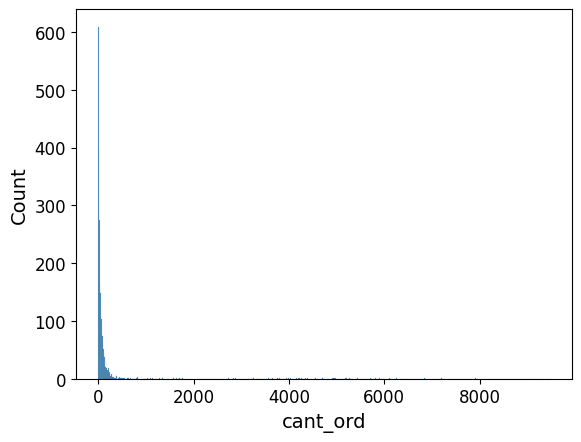

,vendor_id,cant_ord
count,2451,2451.000000
unique,2451,NaN
top,++8CogUcvgdzKsclMwWCWCNTGDVlM150MlIAhL3Jza8=,NaN
freq,1,NaN
mean,NaN,200.232966
std,NaN,805.918663
min,NaN,1.000000
25%,NaN,12.000000
50%,NaN,31.000000
75%,NaN,84.000000


In [20]:
cant_ord_vendor = ordenes_df.groupby('vendor_id')['order_id'].count().reset_index().rename(columns={'order_id': 'cant_ord'})
sns.histplot(
    data = cant_ord_vendor,
    x = 'cant_ord'
)
plt.show()

cant_ord_vendor.describe(include='all')

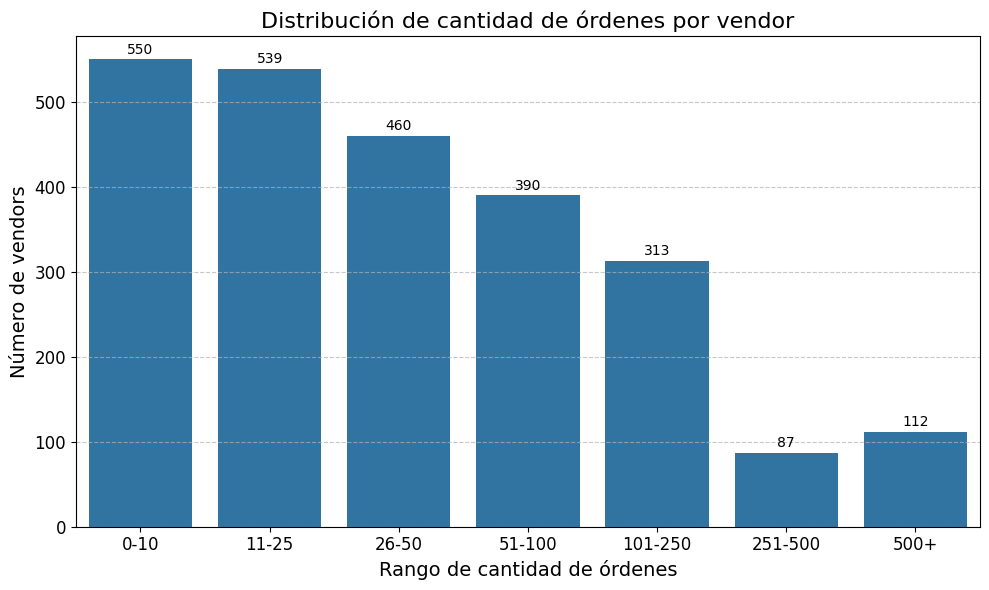

In [21]:
# Bins y etiquetas
bins = [0, 10, 25, 50, 100, 250, 500, float('inf')]
labels = ['0-10', '11-25', '26-50', '51-100', '101-250', '251-500', '500+']

# Columna con rangos
cant_ord_vendor['cant_ord_bin'] = pd.cut(
    cant_ord_vendor['cant_ord'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

bin_counts = cant_ord_vendor['cant_ord_bin'].value_counts(sort=False)

bin_df = bin_counts.reset_index()
bin_df.columns = ['Rango', 'Cantidad']

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_df, x='Rango', y='Cantidad')

for index, row in bin_df.iterrows():
    plt.text(index, row['Cantidad'] + 3, str(row['Cantidad']), ha='center', va='bottom', fontsize=10)

plt.title('Distribución de cantidad de órdenes por vendor')
plt.xlabel('Rango de cantidad de órdenes')
plt.ylabel('Número de vendors')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
cant_ord_vendor[cant_ord_vendor['cant_ord'] == 1].shape

(54, 3)

### embeddings_df

In [23]:
df = productos_embeddings_df
print(f'El tamaño de la tabla es {df.shape}','\n')
print(df.info(),'\n')
display(df.head())
print('\n')
display(df.describe(include='all'))

El tamaño de la tabla es (41290, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41290 entries, 0 to 41289
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name_hash  41289 non-null  object
 1   level_one_hash     41289 non-null  object
 2   level_two_hash     41289 non-null  object
 3   emb_str            41289 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB
None 



,product_name_hash,level_one_hash,level_two_hash,emb_str
0,xQ7BMQrls+WZjoSH16zqBZJfQAKVroX5s592SpZdaDo=,j9rGnG/pzbx4OOtKSKpva8/DUIg3CEcjMGEFTzDyWzQ=,KhpjVe1+MLDuo6eWejHpxC9q+oF/v2VV3zvv3wWuOOA=,"[-2.6736120801007486, 2.5017602124128344, 4.02..."
1,kLdpQmFaW3ao7s9uBBIuZpklRynHY17HrT4cWl3EGeQ=,j9rGnG/pzbx4OOtKSKpva8/DUIg3CEcjMGEFTzDyWzQ=,KhpjVe1+MLDuo6eWejHpxC9q+oF/v2VV3zvv3wWuOOA=,"[-2.685921532450792, 8.478663436692992, 7.3509..."
2,Dzd0E4pivTlNkC6GXcRTCBtnWW5rezG86tmzu3b6ocw=,YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=,2W65AfnZg9stV1JCpPwbsh29j5QLlmq3ppDWUyOrG/4=,"[-7.497223347403356, -6.605207930283159, 2.125..."
3,PhpcxBVRFyTjetvwuQjnLR/aBLrg0HcRNY5lOTjGFg4=,d3tkX0YZNlcXN9zTx28r2QBh7sq0A75RQajGAD1QAXk=,NHaQO8ZUctT+wVoUDX+CSQs6g59ioz1pEzChJ5H2Mfo=,"[2.9591851132784144, -8.899510864876401, 22.39..."
4,w1moMmJeX0j4WUtgcH+JADtehbHBO9K0XD0VUXyV/Gk=,YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=,BEpazcfJQvCAAZzlg+rw7c/5t8ECYnQ0UWd3GEcVYRg=,"[-5.256198023324729, -8.807794405004367, -1.05..."


,product_name_hash,level_one_hash,level_two_hash,emb_str
count,41289,41289,41289,41289
unique,41020,14,53,41289
top,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=,GuGMXDFmEZuVZD+ZjFuYO+gK7g/S4n94i0gODmyQAEo=,"[-2.6736120801007486, 2.5017602124128344, 4.02..."
freq,5,7816,3865,1


- Tenemos 41020 productos unicos en 41289. Deberiamos estudiar que esta pasando con los registros duplicados
- Existen 14 categorias de `level_one_hash`
- Existen 53 categorias de `level_two_hash`
- Los 41289 registros contienen valores diferentes de `emd_str`
- Tenemos un registro nulo.

In [24]:
display(productos_embeddings_df[productos_embeddings_df.isnull().any(axis=1)])
productos_embeddings_df = productos_embeddings_df.dropna().reset_index()

display(productos_embeddings_df.describe(include='all'))

,product_name_hash,level_one_hash,level_two_hash,emb_str
141,NaN,NaN,NaN,NaN


,index,product_name_hash,level_one_hash,level_two_hash,emb_str
count,41289.000000,41289,41289,41289,41289
unique,NaN,41020,14,53,41289
top,NaN,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=,GuGMXDFmEZuVZD+ZjFuYO+gK7g/S4n94i0gODmyQAEo=,"[-2.6736120801007486, 2.5017602124128344, 4.02..."
freq,NaN,5,7816,3865,1
mean,20644.996585,NaN,NaN,NaN,NaN
std,11919.257864,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,10323.000000,NaN,NaN,NaN,NaN
50%,20645.000000,NaN,NaN,NaN,NaN
75%,30967.000000,NaN,NaN,NaN,NaN


In [25]:
conteo_emb = productos_embeddings_df.groupby('product_name_hash').size().reset_index(name='count')
no_unicos = conteo_emb[conteo_emb['count'] > 1].sort_values(by='count',ascending=False)
no_unicos

,product_name_hash,count
909,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,5
10579,EbtTTWti7peserJkQ4aoEdOksr7t7wRU55C2ekVfXZ4=,3
25555,c2bXZaewrhoNs3EnFY9v9GF67W1cm1vT9AVNfZzpKRA=,3
33132,nh4toBQgclzp7ze++jz4WsEolh1qY3JmA2tujdHAp1I=,3
34190,pKjjRo8Str4LOwK+I2knAZojAqs1bS825JMBnbqdDQc=,3
...,...,...
14933,LQSi3pYVtKzvmCr0JpYZp/Wko2b7SDzuKXyLKInDaAY=,2
15028,LbD+x9K5hL8ODJbfX9D5Sm/dgLQZ5+DYalvrY89lBp0=,2
15210,LuEQFiv3yCeSJlj30v9EvT1iI3DUsRkBc2Ed4ZPeQbw=,2
15510,MLTc8FL2L6wfypjasLPZ2TDkACNRwdZC3oagKCzoZtc=,2


In [26]:
hash_particular = '/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ='
condicion = productos_embeddings_df['product_name_hash'] == hash_particular
productos_embeddings_df[condicion]

,index,product_name_hash,level_one_hash,level_two_hash,emb_str
1543,1544,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-9.131036406026517, 0.9788029937532836, -4.16..."
11993,11994,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=,FxpSEwFAPZpW6vEhzLqZN2HlcFS/fZpW2wWTmNcaXdU=,"[-9.033888254627545, 1.4259664043355416, -7.19..."
26363,26364,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,+URndgv0vGuVIf+pMp0PHbzKD1rAgIvYVS+zdaVl+54=,elAOnrHO9tFGCLhrm01NYdP0W/28StJiXhC5mk/7YO8=,"[-8.953838474693251, 2.6029802742387185, -3.68..."
39796,39797,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,j9rGnG/pzbx4OOtKSKpva8/DUIg3CEcjMGEFTzDyWzQ=,wmpDxVMoxQkhprjOcYSIwUAqvWdARd+oOMV8FP93/pk=,"[-10.381777162395686, 2.679894820252769, -4.93..."
41228,41229,/OStMNMNE18Wr5G6zjiy4wBfDadk5PrcWKjc7pW/KlQ=,YcD/KOUl/GnyEZ6dY0UMLaI+R4dyKu1e1Fn4bi+6v30=,z2Z6IE2dnreL8hbX9W8wirPZ3mB0pklACyuG76hHhzQ=,"[-11.73056449703036, 11.439508175022441, -2.45..."


Tenemos algunos productos que se encuentran en diferentes `level_one_hash`. Si fuesen pocos casos uno podria pensar que es un error, pero 253 productos no parece ser casualidad. Se interpreta que hay productos que entran en diferentes categorias dependiendo por ejemplo de la tienda en la que se vende.

In [27]:
# Lista de letras A-N (14 primeras letras)
letras = list(string.ascii_uppercase[:14])

# Diccionario de asignación
hashes_unicos_level1 = productos_embeddings_df['level_one_hash'].unique()
mapa_level1 = {hash_: letras[i % len(letras)] for i, hash_ in enumerate(hashes_unicos_level1)}

productos_embeddings_df['categoria_level1'] = productos_embeddings_df['level_one_hash'].map(mapa_level1)

# Diccionario de asignación numérica
hashes_unicos_level2 = productos_embeddings_df['level_two_hash'].unique()
mapa_level2 = {hash_: (i+1) for i, hash_ in enumerate(hashes_unicos_level2)}

productos_embeddings_df['categoria_level2'] = productos_embeddings_df['level_two_hash'].map(mapa_level2)

productos_embeddings_df.groupby(['categoria_level2', 'categoria_level1'])['product_name_hash'] \
    .count() \
    .reset_index(name='conteo') \
    .sort_values(by='categoria_level1')


,categoria_level2,categoria_level1,conteo
0,1,A,76
51,52,A,1337
4,5,A,103
13,14,A,236
27,28,A,535
24,25,B,995
25,26,B,1647
21,22,B,1423
29,30,B,2659
46,47,B,924


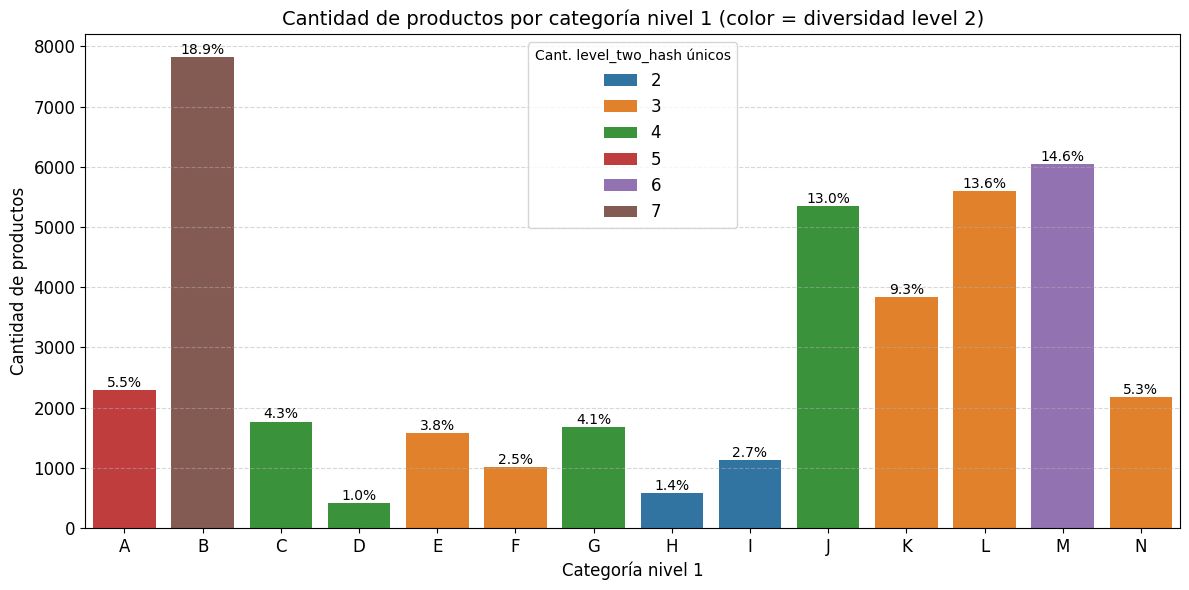

In [28]:
# Cantidad level_two_hash únicos hay por categoria_level1
cant_level2_por_cat1 = productos_embeddings_df.groupby('categoria_level1')['level_two_hash'].nunique()

productos_embeddings_df['diversidad_level2'] = productos_embeddings_df['categoria_level1'].map(cant_level2_por_cat1)

valores_unicos = sorted(productos_embeddings_df['diversidad_level2'].unique())
palette = sns.color_palette('tab10', len(valores_unicos))  
palette_dict = {val: palette[i] for i, val in enumerate(valores_unicos)}

conteo_cat1 = productos_embeddings_df['categoria_level1'].value_counts().sort_index()
total_productos = conteo_cat1.sum()

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=productos_embeddings_df,
    x='categoria_level1',
    order=sorted(productos_embeddings_df['categoria_level1'].unique()),
    hue='diversidad_level2',
    palette=palette_dict,
    dodge=False
)

for i, cat in enumerate(sorted(productos_embeddings_df['categoria_level1'].unique())):
    count = conteo_cat1[cat]
    pct = count / total_productos * 100
    ax.text(i, count + 1, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de productos por categoría nivel 1 (color = diversidad level 2)', fontsize=14)
plt.xlabel('Categoría nivel 1', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Cant. level_two_hash únicos', loc='upper center')
plt.tight_layout()
plt.show()


Tenemos 14 categorias de `level_one_hash`. La de mayor frecuencia aparece en casi el 19% de los productos. La de menor en en 0.01% de los productos. Podria ser util renombrar las categorias con el fin de tener nombres mas comunes.

In [29]:
productos_embeddings_df[productos_embeddings_df['categoria_level1'] == 'H']

,index,product_name_hash,level_one_hash,level_two_hash,emb_str,categoria_level1,categoria_level2,diversidad_level2
527,528,n/ZKYRUBmR/b0wJj5vUN17YhKopsOxNCF8Qt5pXBOGE=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,iTq6WkpbeNc1Cyz5LFRbfmhXwu+79HpnSJnxvvBFx/g=,"[-6.806886212748395, -6.714068896649622, 8.685...",H,12,2
644,645,Zbbrh3ZNKvS75hJxgPJXx52vp5cX9CtSdjsW2mevS4g=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,iTq6WkpbeNc1Cyz5LFRbfmhXwu+79HpnSJnxvvBFx/g=,"[-2.146371492699302, -7.5361577183960495, 12.9...",H,12,2
1477,1478,/8bQPXqK0Da3B9BmRX9vOptNasDQlzsn9/wzK7XYNNo=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-5.678051966811473, 4.5298317556067484, -0.26...",H,15,2
1478,1479,ede3zE3hH0QMLg22GpQHpu5zsT53eSCTeRowrhDya6Q=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-9.871574903739136, 2.589037690853567, -5.026...",H,15,2
1479,1480,h2eyCsvwzUAT1H0/nYxXf5DJBbQ5yo5QTEdaKwFtGz8=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-9.345722867795393, 4.779368704830433, -1.376...",H,15,2
...,...,...,...,...,...,...,...,...
2049,2050,nE0TuwBjk0cawDA9F2Y1kZ32IFdBF4dGwKIaEuizo4o=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-8.876299120832472, 10.272014105725471, -1.53...",H,15,2
2050,2051,2iQBTGBz3oaGqMuP0B6M4lCZPFMkIl1/kwRG38LieRw=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-11.746743519166634, 5.042531168055524, -0.85...",H,15,2
2051,2052,gp8RJGYKqn5jvImA2nVJ9upuWgHkfr8AeP/SNtPfSuE=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-9.183976136177902, 4.916919776535728, -2.809...",H,15,2
2052,2053,ejm9S0GyIC4xhFRcwUZ8K1CgKDuMk4dC65En8nfBxtI=,IIs0Dfr9gIXEb3JW2v1lSLyR427axo1PdRtcalIGe7k=,5OsYBp1lqqkBzstmNxFV84lkN5ZCjp1UxfUSfJGrP9w=,"[-7.773713850344984, 4.630048539502502, 2.4304...",H,15,2


In [30]:
productos_embeddings_df.groupby(['level_one_hash','level_two_hash'])['product_name_hash'].count()

level_one_hash                                level_two_hash                              
+URndgv0vGuVIf+pMp0PHbzKD1rAgIvYVS+zdaVl+54=  d5CJs/dXUWILnjUhD7Wt2NaFpZIcKXHvu2GzVu8qkLE=     683
                                              elAOnrHO9tFGCLhrm01NYdP0W/28StJiXhC5mk/7YO8=    1281
                                              lBhAoyplRB+X6/Jp/RyMX4mYWx7TbssoLuOFXcJ/U/0=     216
0qQE+zoXqrYKDZahJywJ+SprXY5XZwc+o/h+IgAkALA=  OrvaBt6Jy+ugf6AdVLRLmpN7yglLytUahuYgLhx5s4U=    1485
                                              enWTn17XrBaT6zYtwEbsoTn3DXPuDQZaHOwUbFws1CE=     822
                                              jw0bMOuldCaGpX+DBaKwRV5xSMQo/Es2dDojuXmC5uA=     556
                                              k1C8GD8OMfRKaaj+zVL9Svj2ED+OOXXwgYeFW9NiAg4=    1488
                                              kETHh6H1TAyrO+zgode55/6Z1Mp8ty47VjheBij64kI=    1277
                                              ocbJf0FfDg7YMq2Ejs4zElZSIWSEPUXwEGYBp92nN6k=     420
1k4OOJJiH3fkCOuh6a

Vemos que efectivamente cada `level_two_hash` se corresponde unicamente con un unico `level_one_hash`.

Analicemos los resultados agrupados

In [31]:
ordenes_productos_ordenes_df = ordenes_df.merge(productos_ordenes_df,on='order_id')

In [32]:
ordenes_productos_emb_df = ordenes_productos_ordenes_df.merge(productos_embeddings_df,on='product_name_hash')
ordenes_productos_emb_df.head()

cant_categorias_unicas = ordenes_productos_emb_df.groupby('order_id')['categoria_level1'].nunique().reset_index()
cant_categorias_unicas.rename(columns={'categoria_level1': 'cant_level_one_unicos'}, inplace=True)


display(cant_categorias_unicas)



,order_id,cant_level_one_unicos
0,++/C/1FQqQ2l3izvRnVCHl9tXw+PxiF98pEk52HudVg=,2
1,++/dlbmbzKIPWJNjFxayi6PD56IwKoBszeneeUPifk4=,1
2,++034fbO73pTicSHcj5hlpkqXeXY0lT6UFKHag6GHPU=,5
3,++0DgrkFcqYe8TI5xkqRaQ7BhnWzbTWEjES4gCYTzZk=,4
4,++0x3370JPQLwOgYg98YrRlQs0sVIIc1be+x6WahWE4=,2
...,...,...
490766,zzxmxt9DkPPgU6JYiBQFfvIy/W1y8cm/E2YwMEf7rnk=,1
490767,zzyKb/1KjaweUWZMrPwF/ZKwJ8qxyDuqq25gsea7U+4=,1
490768,zzyRaZbqxSfz8yS5tw7q17zM00zbAzBE0+lYYFUgSAw=,2
490769,zzyS5KwI4qJlqMEjk7RvWiugregAkhHKUvXXkUh4dtk=,2


In [33]:
resumen_por_cat = ordenes_productos_emb_df.groupby( 'categoria_level1')['order_id'].count().reset_index(name = 'cantidad_ordenes').round(0)
resumen_por_cat['conteo_porc'] = (resumen_por_cat['cantidad_ordenes'] / resumen_por_cat['cantidad_ordenes'].sum(axis=0)).round(3)

resumen_por_cat_total = ordenes_productos_emb_df.groupby( 'categoria_level1')['total_amount'].sum().reset_index(name = 'venta_total').round(0)
resumen_por_cat_total['venta_porc'] = (resumen_por_cat_total['venta_total'] / resumen_por_cat_total['venta_total'].sum(axis=0)).round(3)
resumen_por_cat = resumen_por_cat.merge(resumen_por_cat_total, on='categoria_level1')
resumen_por_cat['valor_promedio_cat'] = (resumen_por_cat['venta_total'] / resumen_por_cat['cantidad_ordenes']).round(2)
resumen_por_cat

,categoria_level1,cantidad_ordenes,conteo_porc,venta_total,venta_porc,valor_promedio_cat
0,A,112435,0.042,5837046.0,0.041,51.91
1,B,447704,0.168,25495508.0,0.179,56.95
2,C,89861,0.034,4264939.0,0.030,47.46
3,D,4647,0.002,235987.0,0.002,50.78
4,E,75334,0.028,4814779.0,0.034,63.91
5,F,51667,0.019,1344499.0,0.009,26.02
6,G,257591,0.096,12093973.0,0.085,46.95
7,H,7130,0.003,383433.0,0.003,53.78
8,I,91017,0.034,5017427.0,0.035,55.13
9,J,465272,0.174,26366559.0,0.186,56.67


In [34]:
ordenes_productos_emb_df.groupby('categoria_level1')['total_amount'].mean()

categoria_level1
A    51.914852
B    56.947242
C    47.461515
D    50.782606
E    63.912436
F    26.022398
G    46.950293
H    53.777351
I    55.126265
J    56.669129
K    57.188161
L    45.653191
M    57.103451
N    56.767558
Name: total_amount, dtype: float64

In [35]:
print(f'Hay un total de {ordenes_productos_emb_df.shape[0]} filas')
ordenes_productos_emb_df['categoria_level1'].value_counts(normalize=1)

Hay un total de 2670775 filas


categoria_level1
J    0.174209
B    0.167631
L    0.153975
M    0.112504
G    0.096448
N    0.093479
A    0.042098
K    0.039970
I    0.034079
C    0.033646
E    0.028207
F    0.019345
H    0.002670
D    0.001740
Name: proportion, dtype: float64

La categoria de producto que mas se pide en cantidad es la J, la que menos se pide en cantidad es la D.

Analicemos la variacion de cantidad de pedidos por categoria por dia y hora.

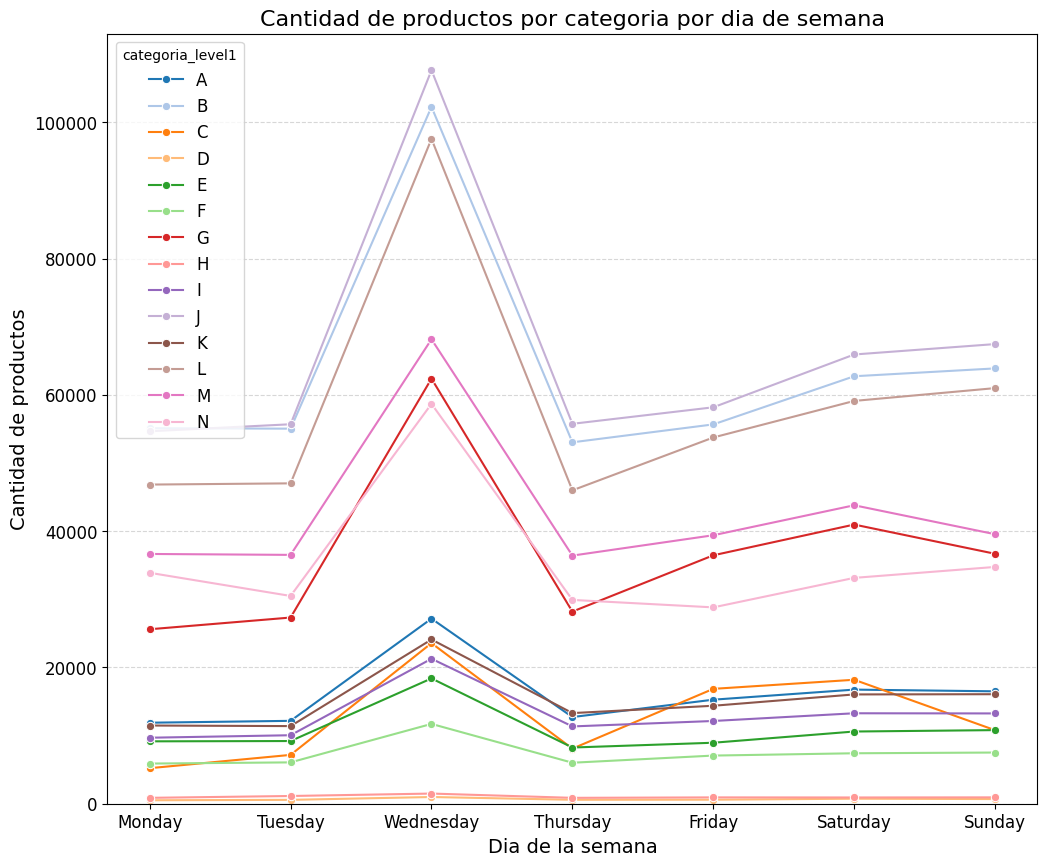

In [36]:
order_counts_dia = ordenes_productos_emb_df.groupby(['weekday', 'categoria_level1'])['order_id'].count().unstack(fill_value=0)

order_counts_dia_melted = order_counts_dia.reset_index().melt(id_vars='weekday', 
                                                      var_name='categoria_level1', 
                                                      value_name='order_count')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

order_counts_dia_melted['weekday'] = pd.Categorical(order_counts_dia_melted['weekday'],
                                                categories=days,
                                                ordered=True)

order_counts_dia_melted = order_counts_dia_melted.sort_values(['weekday','categoria_level1'])

#display(order_counts_dia_melted)

plt.figure(figsize=(12,10))
sns.lineplot(data = order_counts_dia_melted,
            x = 'weekday',
            y = 'order_count',
            hue = 'categoria_level1',
            marker='o',
            palette = 'tab20')
plt.ylim(0)
plt.title('Cantidad de productos por categoria por dia de semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de productos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [37]:
amount_per_cat = ordenes_productos_emb_df.groupby( 'categoria_level1')['total_amount'].sum().reset_index().round(0)
amount_per_cat['percentege'] = (amount_per_cat['total_amount'] / amount_per_cat['total_amount'].sum(axis=0)).round(3)
amount_per_cat

,categoria_level1,total_amount,percentege
0,A,5837046.0,0.041
1,B,25495508.0,0.179
2,C,4264939.0,0.030
3,D,235987.0,0.002
4,E,4814779.0,0.034
5,F,1344499.0,0.009
6,G,12093973.0,0.085
7,H,383433.0,0.003
8,I,5017427.0,0.035
9,J,26366559.0,0.186


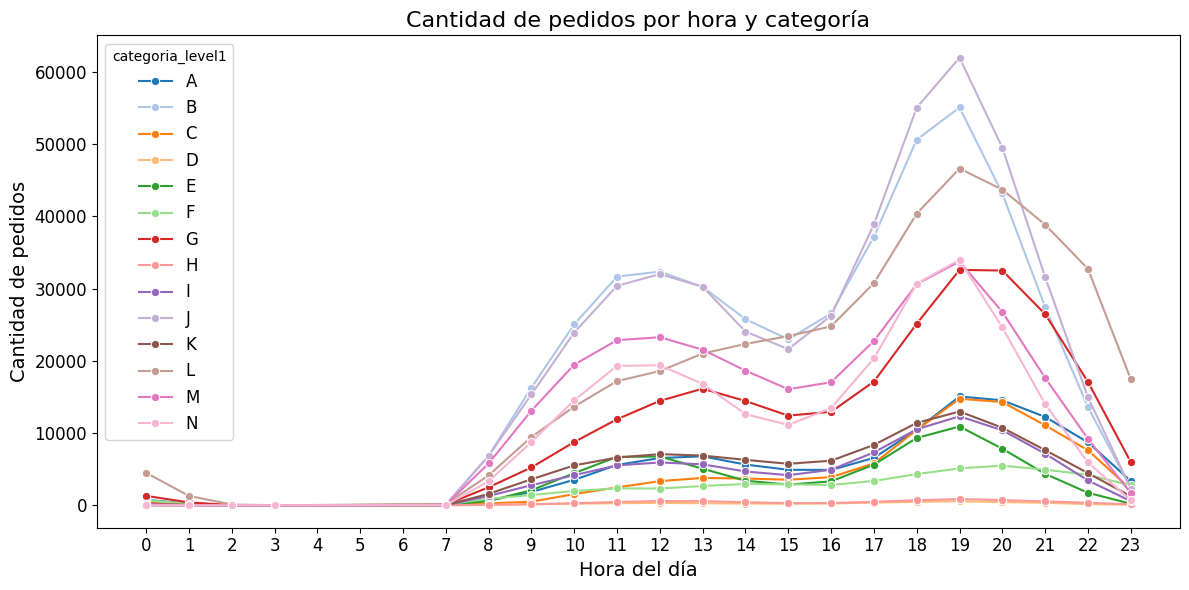

In [38]:
order_counts_hora = ordenes_productos_emb_df.groupby(['hour', 'categoria_level1'])['order_id'].count().unstack(fill_value=0)

order_counts_hora_melted = order_counts_hora.reset_index().melt(id_vars='hour', 
                                                      var_name='categoria_level1', 
                                                      value_name='order_count')

order_counts_hora_melted['hour'] = pd.Categorical(order_counts_hora_melted['hour'],
                                             categories=range(24),
                                             ordered=True)

order_counts_hora_melted = order_counts_hora_melted.sort_values(['hour','categoria_level1'])

# Graficamos
plt.figure(figsize=(12,6))
sns.lineplot(data=order_counts_hora_melted,
             x='hour',
             y='order_count',
             hue='categoria_level1',
             marker='o',
             palette='tab20')
plt.title("Cantidad de pedidos por hora y categoría")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de pedidos")
plt.xticks(range(24))
plt.tight_layout()
plt.show()


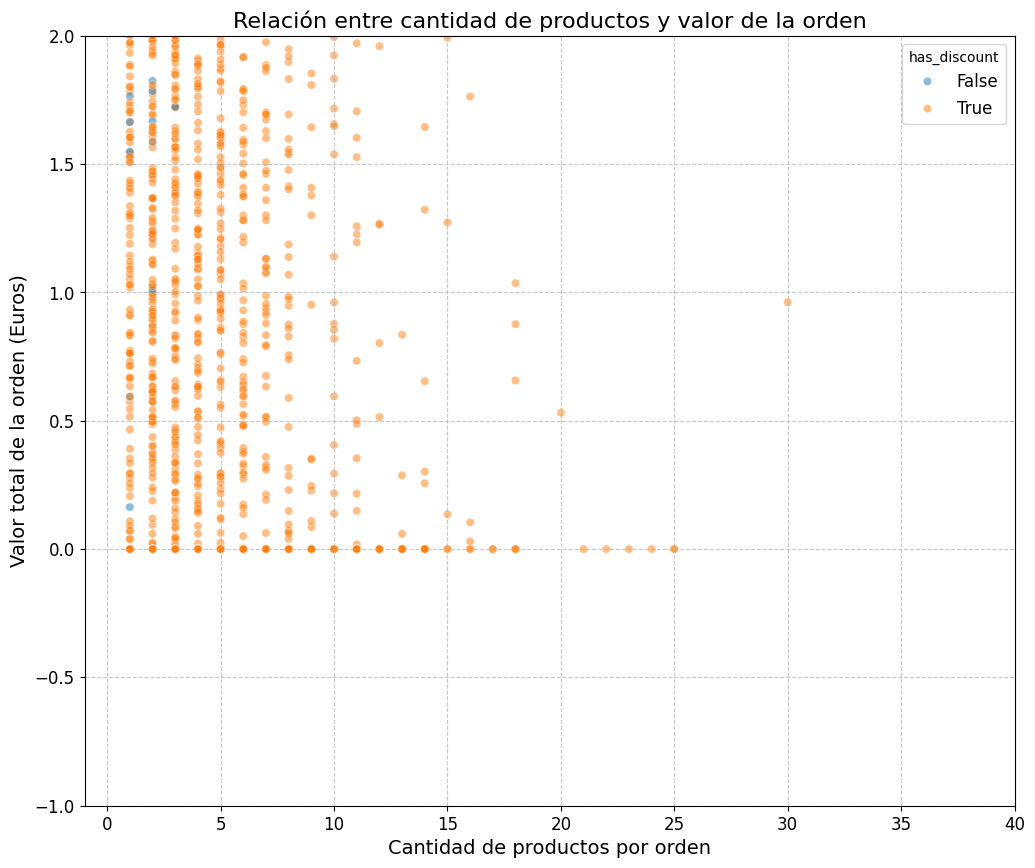

In [39]:
ordenes_extra_df = ordenes_df.merge(num_ped_orden, on='order_id')
ordenes_extra_df = ordenes_extra_df.merge(cant_categorias_unicas, on='order_id')
ordenes_extra_df['cant_level_one_unicos'] = ordenes_extra_df['cant_level_one_unicos'].astype('category')
ordenes_extra_df['precio_prom_prod'] = ordenes_extra_df['total_amount'] / ordenes_extra_df['cant_prod_por_ped']
#ordenes_extra_df['log_ppc'] = np.log1p(ordenes_extra_df['precio_prom_prod'])


plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=ordenes_extra_df,
    x='cant_prod_por_ped',  # columna con la cantidad de productos
    y='total_amount',
    hue = 'has_discount',
    #palette='YlGnBu',
    alpha = 0.5
)

plt.title('Relación entre cantidad de productos y valor de la orden')
plt.xlabel('Cantidad de productos por orden')
plt.ylabel('Valor total de la orden (Euros)')
#plt.legend(title = 'Cantidad de categorias')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-1,2)
plt.xlim(-1,40)
plt.show()

In [40]:
productos_embeddings_df["embedding"] = productos_embeddings_df["emb_str"].apply(json.loads)

embeddings_df = pd.DataFrame(productos_embeddings_df["embedding"].tolist())

embeddings_df.columns = [f'emb_{i}' for i in range(embeddings_df.shape[1])]

embeddings_df = pd.concat([productos_embeddings_df.drop(columns=["emb_str", "embedding",'index']), embeddings_df], axis=1)

print(embeddings_df.head())

                              product_name_hash  \
0  xQ7BMQrls+WZjoSH16zqBZJfQAKVroX5s592SpZdaDo=   
1  kLdpQmFaW3ao7s9uBBIuZpklRynHY17HrT4cWl3EGeQ=   
2  Dzd0E4pivTlNkC6GXcRTCBtnWW5rezG86tmzu3b6ocw=   
3  PhpcxBVRFyTjetvwuQjnLR/aBLrg0HcRNY5lOTjGFg4=   
4  w1moMmJeX0j4WUtgcH+JADtehbHBO9K0XD0VUXyV/Gk=   

                                 level_one_hash  \
0  j9rGnG/pzbx4OOtKSKpva8/DUIg3CEcjMGEFTzDyWzQ=   
1  j9rGnG/pzbx4OOtKSKpva8/DUIg3CEcjMGEFTzDyWzQ=   
2  YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=   
3  d3tkX0YZNlcXN9zTx28r2QBh7sq0A75RQajGAD1QAXk=   
4  YCMAt3VuWcI2RYMCnJ7gUi7zJX+yp/HKlL9Nge5l6xM=   

                                 level_two_hash categoria_level1  \
0  KhpjVe1+MLDuo6eWejHpxC9q+oF/v2VV3zvv3wWuOOA=                A   
1  KhpjVe1+MLDuo6eWejHpxC9q+oF/v2VV3zvv3wWuOOA=                A   
2  2W65AfnZg9stV1JCpPwbsh29j5QLlmq3ppDWUyOrG/4=                B   
3  NHaQO8ZUctT+wVoUDX+CSQs6g59ioz1pEzChJ5H2Mfo=                C   
4  BEpazcfJQvCAAZzlg+rw7c/5t8ECYnQ0UWd3GEcVYRg

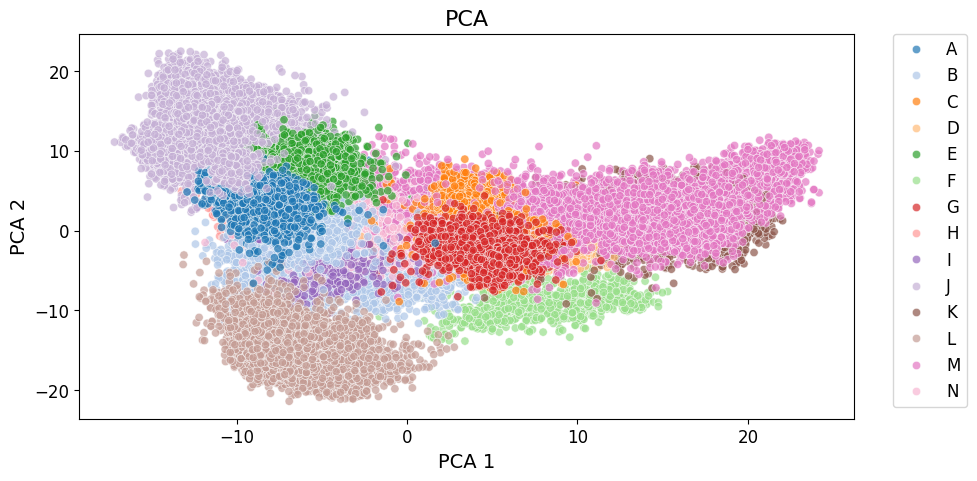

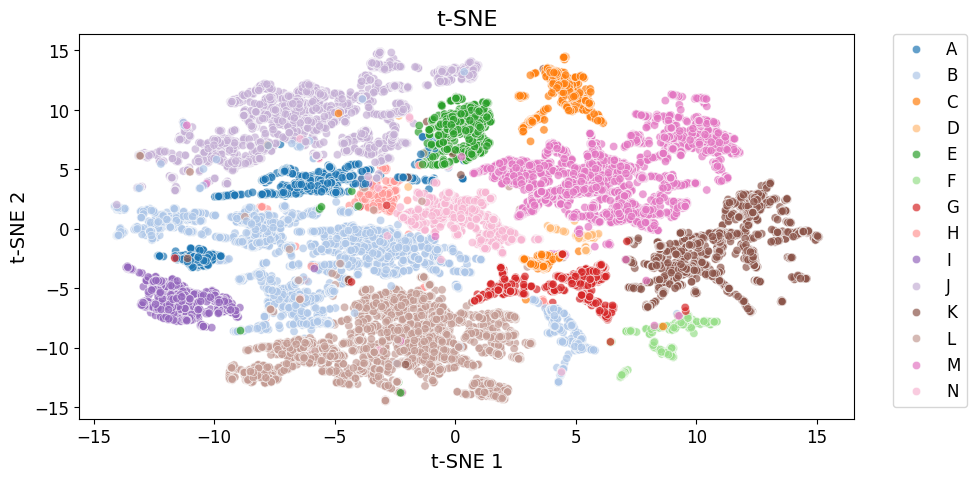

In [41]:
embedding_cols = [col for col in embeddings_df.columns if col.startswith('emb_')]

# Creacion de embedding (Correr si no tenemos embedding.csv

if Flag:
    X = embeddings_df[embedding_cols]

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)
    embeddings_df['pca_1'] = pca_result[:, 0]
    embeddings_df['pca_2'] = pca_result[:, 1]

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
    tsne_result = tsne.fit_transform(X)
    embeddings_df['tsne_1'] = tsne_result[:, 0]
    embeddings_df['tsne_2'] = tsne_result[:, 1]

    embeddings_df.to_csv('EDA_embeddings_df.csv',index=False)

else:
    embeddings_df = pd.read_csv('EDA_embeddings_df.csv')

# Gráfica PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(data = embeddings_df, x = 'pca_1', y = 'pca_2', hue = 'categoria_level1', palette = 'tab20',alpha = 0.7)
plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Gráfica t-SNE
plt.figure(figsize=(10, 5))
sns.scatterplot(data = embeddings_df, x = 'tsne_1', y = 'tsne_2', hue = 'categoria_level1', palette = 'tab20',alpha = 0.7)
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


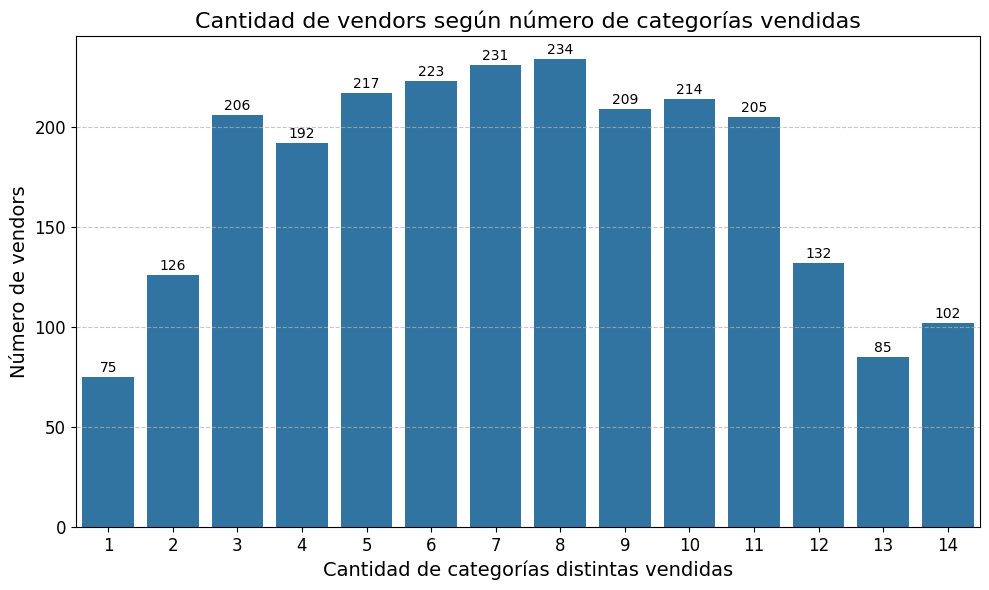

In [42]:
cat_por_vendor = (
    ordenes_productos_emb_df
    .groupby('vendor_id')['categoria_level1']
    .nunique()
    .reset_index()
    .rename(columns={'categoria_level1': 'cat_por_vendor'})
)

cat_counts = cat_por_vendor['cat_por_vendor'].value_counts().sort_index()
cat_counts_df = cat_counts.reset_index()
cat_counts_df.columns = ['cat_por_vendor', 'Cantidad']

plt.figure(figsize=(10,6))
sns.countplot(data=cat_por_vendor, x='cat_por_vendor')

for index, row in cat_counts_df.iterrows():
    plt.text(index, row['Cantidad'] + 1, str(row['Cantidad']), ha='center', va='bottom')

plt.title('Cantidad de vendors según número de categorías vendidas')
plt.xlabel('Cantidad de categorías distintas vendidas')
plt.ylabel('Número de vendors')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


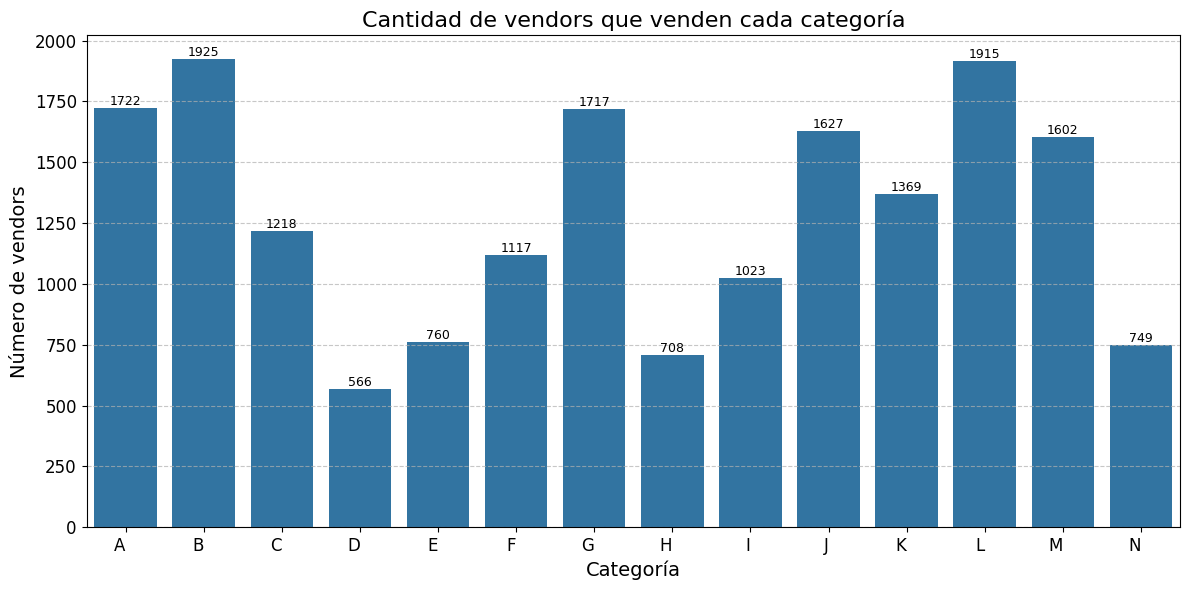

In [43]:
vendor_por_cat = (
    ordenes_productos_emb_df
    .groupby('categoria_level1')['vendor_id']
    .nunique()
    .reset_index()
    .rename(columns={'vendor_id': 'vendor_por_cat'})
)

cat_counts = vendor_por_cat['vendor_por_cat'].value_counts().sort_index()
cat_counts_df = cat_counts.reset_index()
cat_counts_df.columns = ['vendor_por_cat', 'Cantidad']

plt.figure(figsize=(12,6))
sns.barplot(data=vendor_por_cat, x='categoria_level1', y='vendor_por_cat')

for index, row in vendor_por_cat.iterrows():
    plt.text(index, row['vendor_por_cat'] + 0.5, str(row['vendor_por_cat']), 
             ha='center', va='bottom', fontsize=9)

plt.title('Cantidad de vendors que venden cada categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de vendors')
plt.xticks( ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


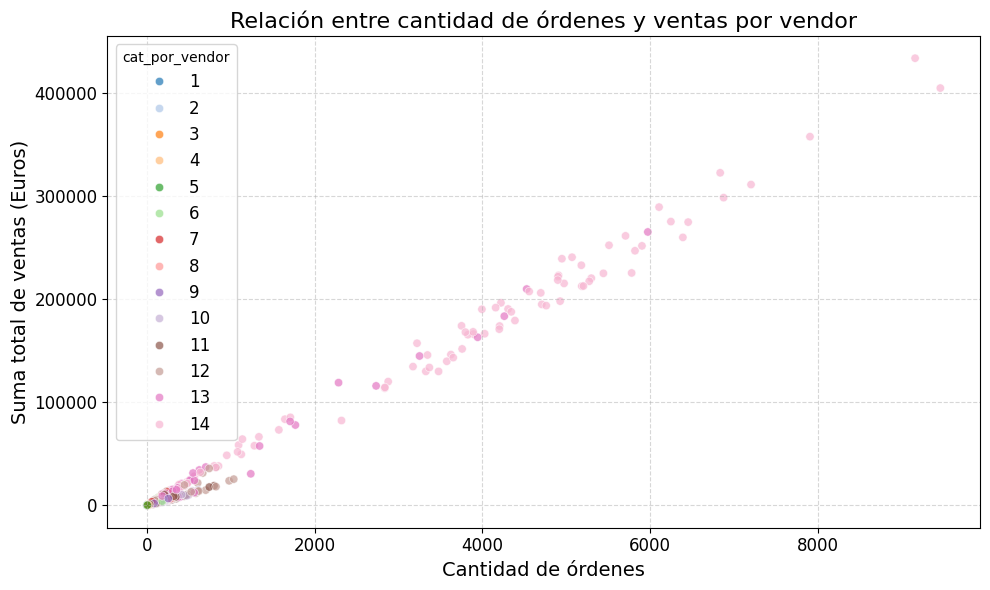

In [44]:
# Cantidad de órdenes por vendor
cant_ordenes = (
    ordenes_df
    .groupby('vendor_id')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'cant_ordenes'})
)

# Suma total de ventas por vendor
ventas_por_vendor = (
    ordenes_df
    .groupby('vendor_id')['total_amount']
    .sum()
    .reset_index()
    .rename(columns={'total_amount': 'suma_ventas'})
)

scatter_df = pd.merge(cant_ordenes, ventas_por_vendor, on='vendor_id')
scatter_df = scatter_df.merge(cat_por_vendor, on='vendor_id')
scatter_df['cat_por_vendor'] = scatter_df['cat_por_vendor'].astype('category')

plt.figure(figsize=(10,6))
sns.scatterplot(data=scatter_df, x='cant_ordenes', y='suma_ventas',hue = 'cat_por_vendor', alpha=0.7,palette = 'tab20')

plt.title('Relación entre cantidad de órdenes y ventas por vendor')
plt.xlabel('Cantidad de órdenes')
plt.ylabel('Suma total de ventas (Euros)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [45]:
ordenes_df['total_amount'].sum()

19511150.38050904

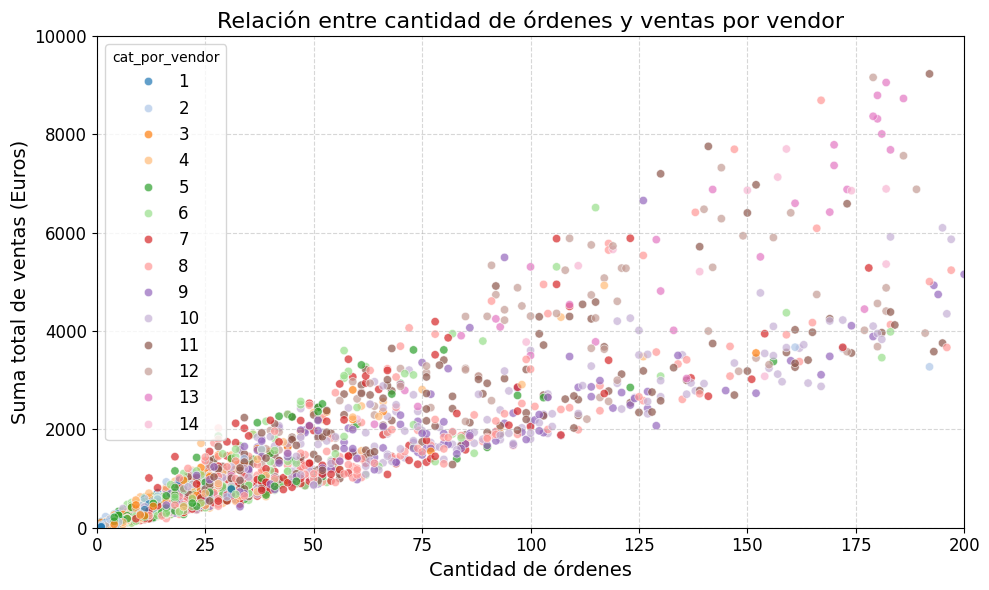

In [46]:
# Cantidad de órdenes por vendor
cant_ordenes = (
    ordenes_df
    .groupby('vendor_id')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'cant_ordenes'})
)

# Suma total de ventas por vendor
ventas_por_vendor = (
    ordenes_df
    .groupby('vendor_id')['total_amount']
    .sum()
    .reset_index()
    .rename(columns={'total_amount': 'suma_ventas'})
)

scatter_df = pd.merge(cant_ordenes, ventas_por_vendor, on='vendor_id')
scatter_df = scatter_df.merge(cat_por_vendor, on='vendor_id')
scatter_df['cat_por_vendor'] = scatter_df['cat_por_vendor'].astype('category')

plt.figure(figsize=(10,6))
sns.scatterplot(data=scatter_df, x='cant_ordenes', y='suma_ventas',hue = 'cat_por_vendor', alpha=0.7,palette = 'tab20',legend=True)

plt.title('Relación entre cantidad de órdenes y ventas por vendor')
plt.xlabel('Cantidad de órdenes')
plt.ylabel('Suma total de ventas (Euros)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0,10000)
plt.xlim(0,200)
plt.tight_layout()
plt.show()


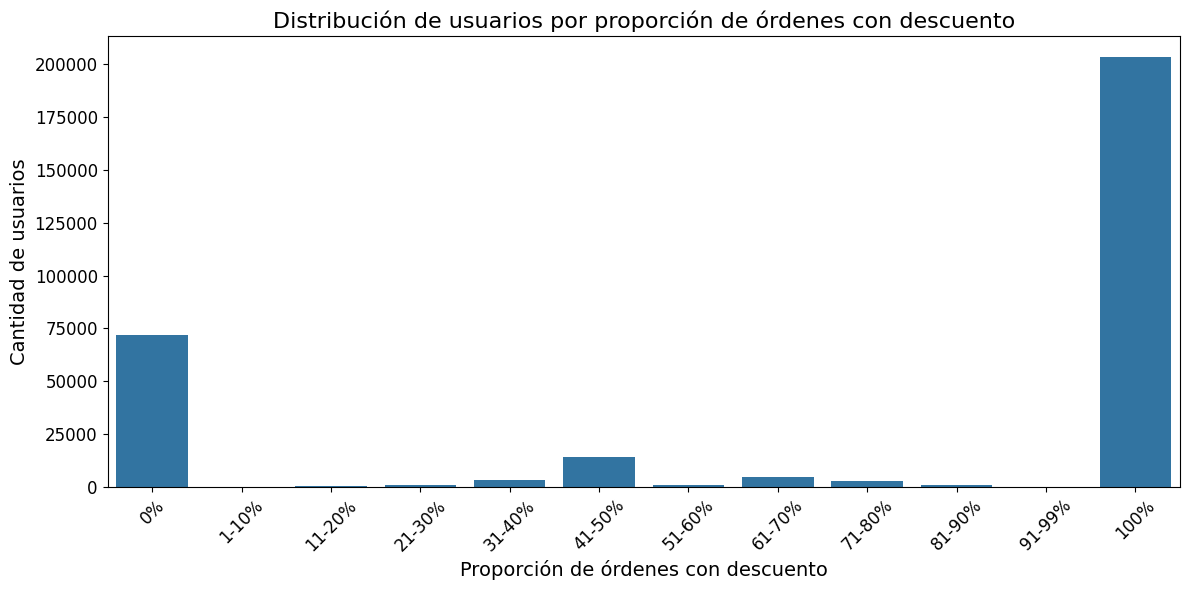

In [47]:
cant_ord_por_usuario = (
    ordenes_df
    .groupby('user_id')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'cant_ordenes'})
)

cant_ord_con_descuento = (
    ordenes_df
    .groupby('user_id')['has_discount']
    .sum()
    .reset_index()
    .rename(columns={'has_discount': 'cant_ordenes_con_descuento'})
)

scatter_df = cant_ord_por_usuario.merge(cant_ord_con_descuento,on='user_id')
scatter_df['prop_desc'] = (scatter_df['cant_ordenes_con_descuento']/ scatter_df['cant_ordenes']).round(2)

bins = [0, 0.01, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99, 1.0]
labels = [
    '0%', '1-10%', '11-20%', '21-30%', '31-40%', '41-50%',
    '51-60%', '61-70%', '71-80%', '81-90%', '91-99%', '100%'
]

scatter_df['prop_desc_binned'] = pd.cut(scatter_df['prop_desc'], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(12, 6))
sns.countplot(data=scatter_df, x='prop_desc_binned', order=labels)
plt.xticks(rotation=45)
plt.xlabel('Proporción de órdenes con descuento')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de usuarios por proporción de órdenes con descuento')
plt.tight_layout()
plt.show()


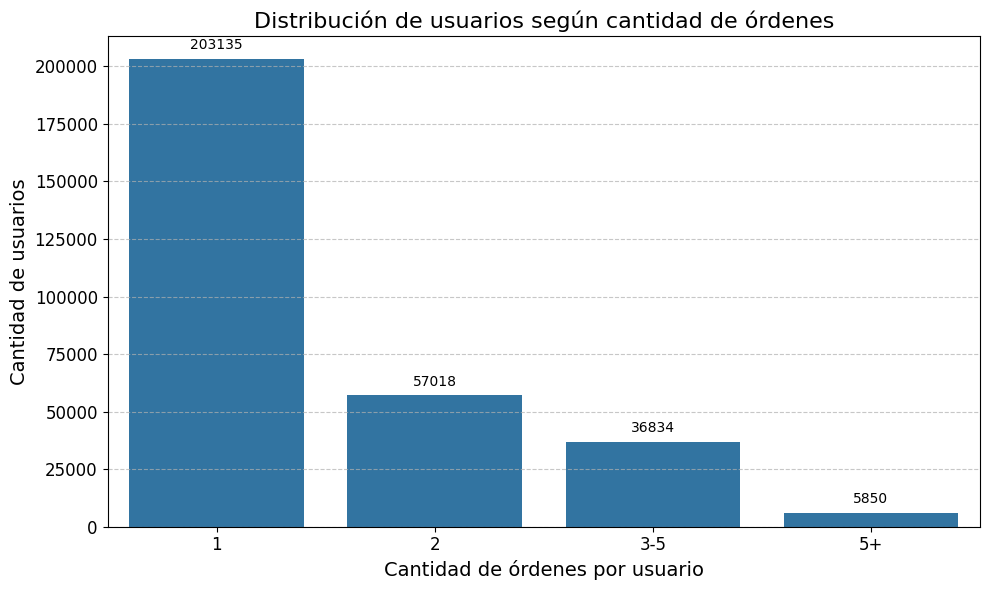

In [48]:
cant_ord_por_usuario = (
    ordenes_df
    .groupby('user_id')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'cant_ordenes'})
)
bins = [0, 1, 2, 5, float('inf')]
labels = ['1', '2','3-5', '5+']

cant_ord_por_usuario['rango_ordenes'] = pd.cut(
    cant_ord_por_usuario['cant_ordenes'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True  # el límite superior está incluido
)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cant_ord_por_usuario, x='rango_ordenes', order=labels)

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.xlabel('Cantidad de órdenes por usuario')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de usuarios según cantidad de órdenes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Construccion de la tabla para alimentar los modelos de clusterizacion


In [49]:
# Merge de las tablas ordenes, productos_orders y productos_embeddings
ordenes_productos_ordenes_df = ordenes_df.merge(productos_ordenes_df,on='order_id')
ordenes_productos_emb_df = ordenes_productos_ordenes_df.merge(productos_embeddings_df,on='product_name_hash')

## Cantidad de productos por orden

Este bloque de código analiza cuántos productos hay por orden y visualiza su distribución en un gráfico de barras. Agrupa los pedidos, cuenta la cantidad de productos asociados a cada uno, los categoriza en rangos (hasta 20 y “20+”), y genera una gráfica que muestra cuántas órdenes caen en cada categoría. Es útil para detectar patrones de volumen en pedidos.

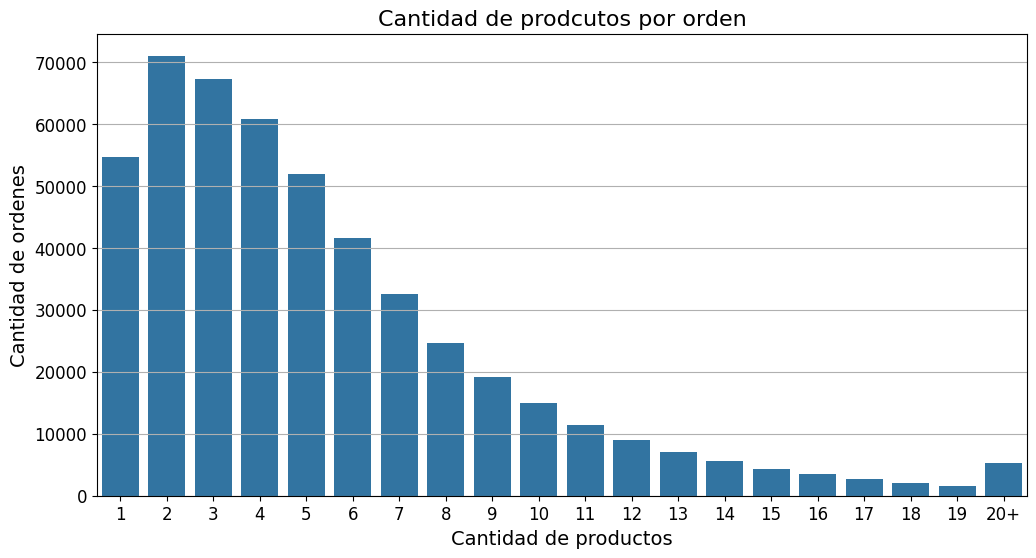

In [50]:
cant_prod_orden = (
    productos_ordenes_df
    .groupby('order_id')['product_name_hash']
    .count()
    .reset_index()
    .rename(columns={'product_name_hash': 'cant_prod_por_ped'})
    .sort_values('cant_prod_por_ped', ascending=False)
)

ordenes_df_cluster = ordenes_df.merge(cant_prod_orden, on= 'order_id')

num = 20
bins = list(range(0, num)) + [float('inf')]  
labels = [str(i) for i in range(1, num)] + [str(num) + "+"]  
order_counts = pd.cut(ordenes_df_cluster['cant_prod_por_ped'], bins=bins, labels=labels, right=True)
distribucion = order_counts.value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(data=distribucion)
plt.title('Cantidad de prodcutos por orden')
plt.xlabel('Cantidad de productos')
plt.ylabel('Cantidad de ordenes')
plt.grid(axis = 'y')
plt.show()

## Cantidad de ordenes por vendor

Cuenta cuántas órdenes recibió cada vendedor y asocia ese total a cada orden.

In [51]:
cant_ordenes_vendor = (
    ordenes_df
    .groupby('vendor_id')['order_id']
    .count()
    .reset_index()
    .rename(columns = {'order_id':'cant_ordenes_vendor'})
)

ordenes_df_cluster = ordenes_df_cluster.merge(cant_ordenes_vendor, on='vendor_id')

## Categorias 1 por vendor

Cantidad de categorias 1 que vendio el vendor en cuestion en el dataset. Nos da nocion de que tan variado es la oferta del vendor.

In [52]:
cat1_por_vendor = (
    ordenes_productos_emb_df
    .groupby('vendor_id')['categoria_level1']
    .nunique()
    .reset_index()
    .rename(columns={'categoria_level1': 'cat1_por_vendor'})
)
ordenes_df_cluster = ordenes_df_cluster.merge(cat1_por_vendor, on='vendor_id')

## Categorias 2 por vendor

Cantidad de categorias 2 que vendio el vendor en cuestion en el dataset. Nos da nocion de que tan variado es la oferta del vendor.

In [53]:
cat2_por_vendor = (
    ordenes_productos_emb_df
    .groupby('vendor_id')['categoria_level2']
    .nunique()
    .reset_index()
    .rename(columns={'categoria_level2': 'cat2_por_vendor'})
)
ordenes_df_cluster = ordenes_df_cluster.merge(cat2_por_vendor, on='vendor_id')

## Distancia euclidea minima, maxima y media de embeddings dentro de cada orden

Calcula la distancia euclidiana promedio, máxima y mínima entre embeddings de productos en cada orden, reflejando cuán similares o diversos son los ítems comprados juntos. Estas métricas enriquecen la clusterización al capturar la heterogeneidad semántica de los pedidos.

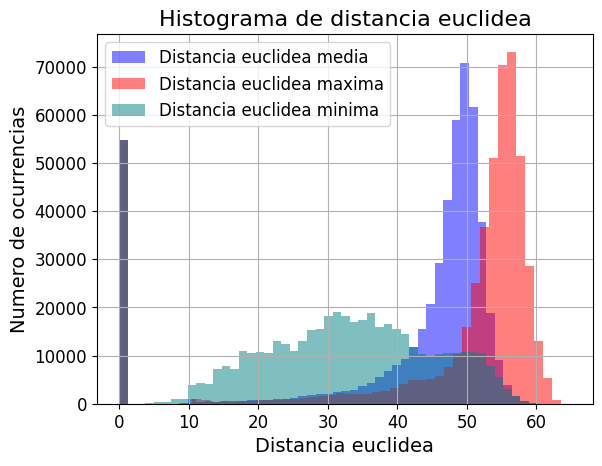

In [54]:
if Flag:  
    prod_por_orden = (
        productos_ordenes_df
        .drop_duplicates(['order_id','product_name_hash'])
        .groupby('order_id')['product_name_hash']
        .agg(list)
        .reset_index()
        .rename(columns={'product_name_hash':'product_name_hash_list'})
    )

    embedding_cols = [col for col in embeddings_df.columns if col.startswith('emb_')]

    emb_dict = {
        row.product_name_hash: row[embedding_cols].values
        for _, row in embeddings_df.iterrows()
    }

    def euclidean_distance(hash_list):
        # Filtrar hashes que existan en emb_dict
        valid_embs = [emb_dict[h] for h in hash_list if h in emb_dict]
        if len(valid_embs) < 2:
            return (0.0, 0.0, 0.0)
        embs = np.vstack(valid_embs)
        # pdist devuelve las distancias de todos los pares
        embs = np.vstack(valid_embs).astype(np.float64)
        dists = pdist(embs, metric='euclidean')
        return (dists.mean(), dists.max(), dists.min())

    prod_por_orden[['mean_euc_dist','max_euc_dist','min_euc_dist']] = prod_por_orden['product_name_hash_list'].apply(euclidean_distance).apply(pd.Series)

    prod_por_orden.to_csv('EDA_prod_por_orden.csv',index=False)

else:
    prod_por_orden = pd.read_csv('EDA_prod_por_orden.csv')

ordenes_df_cluster = ordenes_df_cluster.merge(prod_por_orden, on='order_id').drop(columns = ['product_name_hash_list'])

plt.hist(prod_por_orden['mean_euc_dist'], bins=50, alpha=0.5, label='Distancia euclidea media', color='blue')
plt.hist(prod_por_orden['max_euc_dist'], bins=50, alpha=0.5, label='Distancia euclidea maxima', color='red')
plt.hist(prod_por_orden['min_euc_dist'], bins=50, alpha=0.5, label='Distancia euclidea minima', color='teal')

plt.title('Histograma de distancia euclidea')
plt.xlabel('Distancia euclidea')
plt.ylabel('Numero de ocurrencias')
plt.grid()
plt.legend()
plt.show()

## Frecuencia global de productos (Grado de popularidad de productos en la orden)

Calcula la frecuencia global promedio y desviación estándar de los productos en cada orden, tomando en cuenta repeticiones. Estas métricas capturan cuán comunes o raros son los ítems comprados y aportan contexto sobre la “popularidad” de los productos dentro de cada pedido.

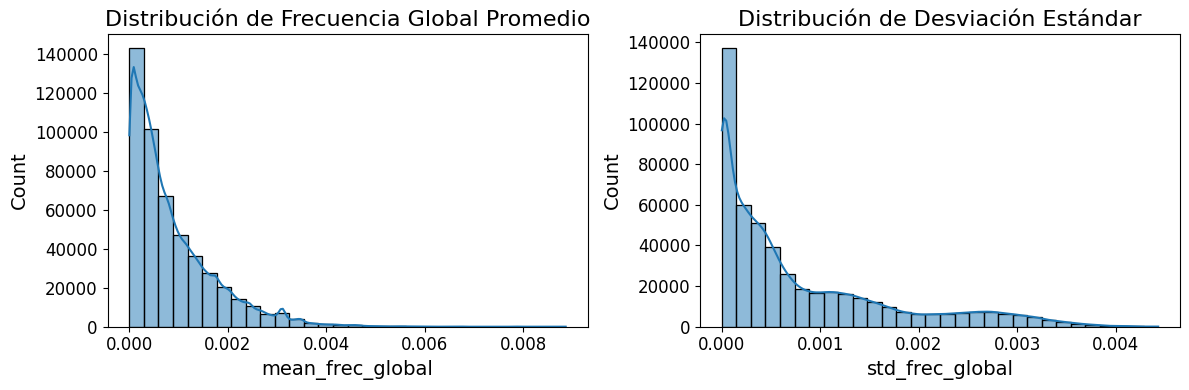

In [55]:
if Flag:
    frec_global = productos_ordenes_df.value_counts('product_name_hash',normalize=1)

    def mean_frec_global(prod_list):
        frecs = [frec_global.get(h, 0) for h in prod_list]
        return np.mean(frecs)

    def std_frec_global(prod_list):
        frecs = [frec_global.get(h, 0) for h in prod_list]
        return np.std(frecs)

    prod_por_orden_con_duplicados =  (
        productos_ordenes_df
        .groupby('order_id')['product_name_hash']
        .agg(list)
        .reset_index()
        .rename(columns={'product_name_hash':'product_name_hash_list'})
    )

    prod_por_orden_con_duplicados['mean_frec_global'] = (
        prod_por_orden_con_duplicados['product_name_hash_list']
        .apply(mean_frec_global)
    )
    prod_por_orden_con_duplicados['std_frec_global'] = (
        prod_por_orden_con_duplicados['product_name_hash_list']
        .apply(std_frec_global)
    )

    prod_por_orden_con_duplicados.to_csv('EDA_prod_por_orden_con_duplicados.csv',index=False)

else:
    prod_por_orden_con_duplicados = pd.read_csv('EDA_prod_por_orden_con_duplicados.csv')

ordenes_df_cluster = ordenes_df_cluster.merge(prod_por_orden_con_duplicados, on = 'order_id').drop(columns = 'product_name_hash_list')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=ordenes_df_cluster, x='mean_frec_global', bins=30, kde=True)
plt.title('Distribución de Frecuencia Global Promedio')
plt.subplot(1, 2, 2)
sns.histplot(data=ordenes_df_cluster, x='std_frec_global', bins=30, kde=True)
plt.title('Distribución de Desviación Estándar')
plt.tight_layout()
plt.show()

## Cantidad de ordenes por usuario

Cuenta cuántas órdenes realizó cada usuario y asocia ese total a las filas correspondientes en el conjunto principal.

In [56]:
cant_ord_user = ordenes_df.groupby("user_id")["order_id"].count().reset_index().rename(columns = {'order_id':'cant_ord_user'})

ordenes_df_cluster = ordenes_df_cluster.merge(cant_ord_user, on = 'user_id')

# Cantidad de órdenes iguales

Genera una firma única de productos por orden (independientemente del orden de compra) y contabiliza cuántas veces se repite esa misma combinación exacta entre pedidos. Luego visualiza la distribución de órdenes idénticas para detectar patrones de repetición o compras recurrentes.

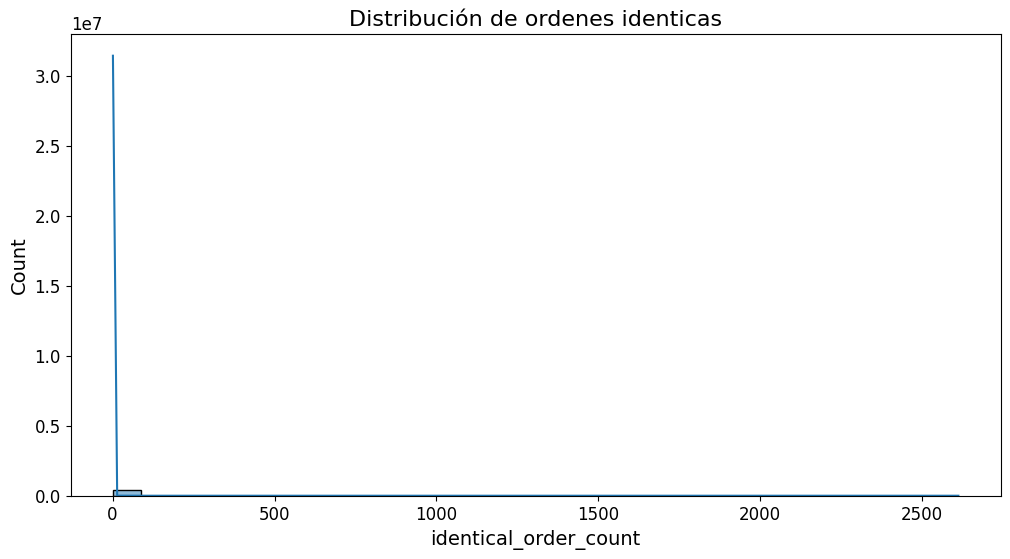

In [57]:
productos_ordenes_df['product_name_hash'] = productos_ordenes_df['product_name_hash'].astype(str)

order_signatures = (
    productos_ordenes_df
    .groupby('order_id')['product_name_hash']
    .apply(lambda x: tuple(sorted(x)))
    .reset_index(name='item_signature')
)

signature_counts = (
    order_signatures['item_signature']
    .value_counts()
    .rename('identical_order_count')
    .reset_index()
)

order_signatures = order_signatures.merge(signature_counts, on='item_signature')
order_signatures = order_signatures[['order_id', 'identical_order_count']].sort_values("identical_order_count",ascending = False)

ordenes_df_cluster = ordenes_df_cluster.merge(order_signatures, on = 'order_id')

plt.figure(figsize=(12,6))
sns.histplot(data=signature_counts, x='identical_order_count', bins=30, kde=True)
plt.title('Distribución de ordenes identicas')
plt.show()

## Ticket promedio

Calcula el precio promedio por producto en cada orden dividiendo el total pagado por la cantidad de ítems.

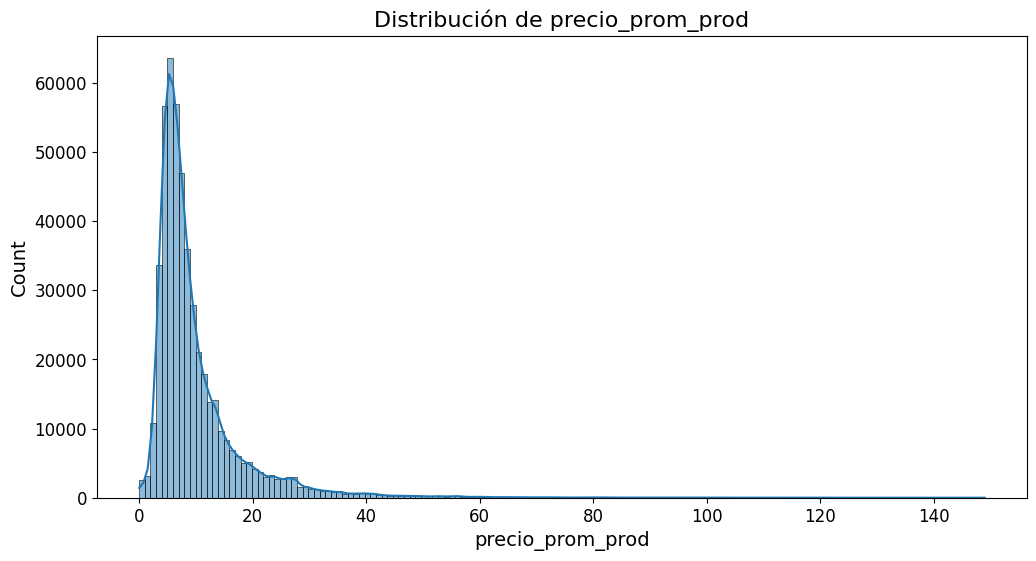

,precio_prom_prod
count,490771.00
mean,10.01
std,8.86
min,0.00
25%,5.21
50%,7.31
75%,11.45
max,148.99


In [58]:
ordenes_df_cluster['precio_prom_prod'] = ordenes_df_cluster['total_amount'] / ordenes_df_cluster['cant_prod_por_ped']

plt.figure(figsize=(12,6))
sns.histplot(data=ordenes_df_cluster, x='precio_prom_prod', bins=150, kde=True)
plt.title('Distribución de precio_prom_prod')
plt.show()

display(ordenes_df_cluster[['precio_prom_prod']].describe().round(2))

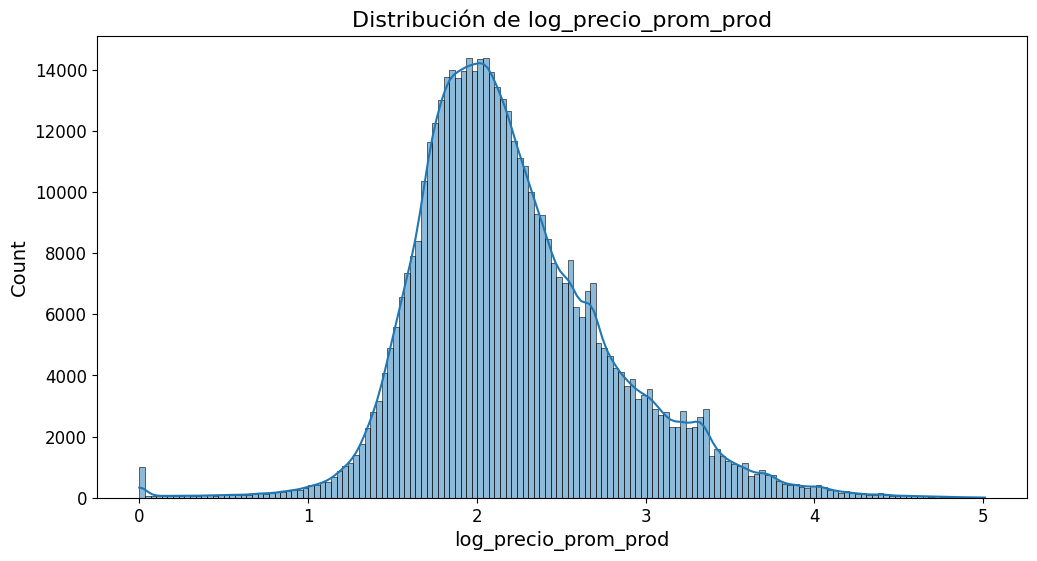

,log_precio_prom_prod
count,490771.00
mean,2.21
std,0.58
min,0.00
25%,1.83
50%,2.12
75%,2.52
max,5.01


In [59]:
ordenes_df_cluster['log_precio_prom_prod'] = np.log1p(ordenes_df_cluster['precio_prom_prod'])
plt.figure(figsize=(12,6))
sns.histplot(data=ordenes_df_cluster, x='log_precio_prom_prod', bins=150, kde=True)
plt.title('Distribución de log_precio_prom_prod')
plt.show()

display(ordenes_df_cluster[['log_precio_prom_prod']].describe().round(2))

## Cantidad categorias 1 unicas en la compra

Calcula cuántas categorías únicas de nivel 1 están presentes en cada orden, indicando la diversidad temática de los productos comprados. Esta variable es útil para identificar órdenes especializadas (poca variedad) versus órdenes más heterogéneas.

Text(0, 0.5, 'Cantidad de ordenes')

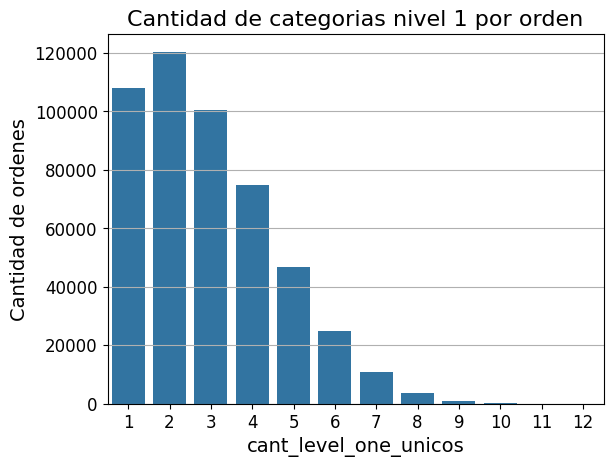

In [60]:
cant_categorias_unicas = ordenes_productos_emb_df.groupby('order_id')['categoria_level1'].nunique().reset_index()
cant_categorias_unicas.rename(columns={'categoria_level1': 'cant_level_one_unicos'}, inplace=True)

ordenes_df_cluster = ordenes_df_cluster.merge(cant_categorias_unicas, on='order_id')

sns.countplot(data = cant_categorias_unicas, x = 'cant_level_one_unicos')
plt.title('Cantidad de categorias nivel 1 por orden')
plt.grid(axis = 'y')
plt.ylabel('Cantidad de ordenes')

## Aux has discount

Indica 1 si la orden tiene descuento y 0 si no tiene.

In [61]:
ordenes_df_cluster['aux_has_discount'] = np.where(ordenes_df_cluster['has_discount'] == True, 1, 0)

## Categorias 1 por orden

Calcula el porcentaje que representa cada categoría de nivel 1 dentro de cada orden. Esto permite analizar la composición temática del pedido en términos relativos, ideal para detectar dominancia o equilibrio entre tipos de productos en órdenes individuales.

In [62]:
cat1_por_prod_order = productos_ordenes_df.merge(
    productos_embeddings_df[['product_name_hash','categoria_level1']],
    on='product_name_hash',
    how='left'
)

conteo_categorias1_orden = pd.crosstab(
    index=cat1_por_prod_order['order_id'],
    columns=cat1_por_prod_order['categoria_level1']
)

conteo_categorias1_orden_pct = conteo_categorias1_orden.div(conteo_categorias1_orden.sum(axis=1), axis=0)

ordenes_df_cluster = ordenes_df_cluster.merge(conteo_categorias1_orden_pct, on = 'order_id')

## Categorias 1 por orden suavizado

Se aplica un suavizado bayesiano a las proporciones de categorías nivel 1 por orden, utilizando un parámetro alpha para combinar la proporción observada con la distribución global. Esto mejora la estabilidad de las estimaciones para órdenes con pocos productos, evitando sesgos extremos por datos escasos.

<Axes: >

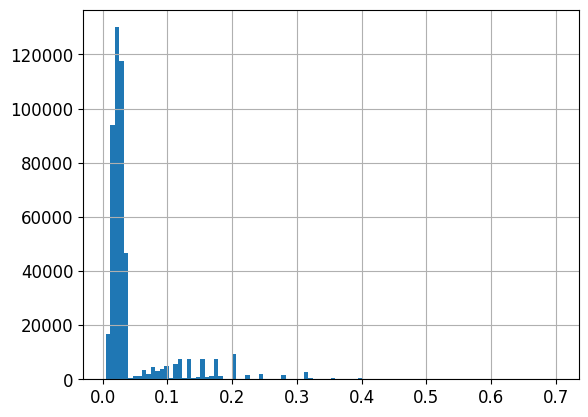

In [63]:
cat_cols = list('ABCDEFGHIJKLMN')
n = ordenes_df_cluster['cant_prod_por_ped']

counts = ordenes_df_cluster[cat_cols].multiply(n, axis=0)

global_counts = counts.sum(axis=0)
global_prop   = global_counts / global_counts.sum()

alpha = 5

smoothed = (counts + alpha * global_prop.values) / (n.values[:,None] + alpha)

ordenes_df_cluster[cat_cols] = smoothed
ordenes_df_cluster['A'].hist(bins = 100)


## Segmento dia-hora

Genera variables que caracterizan el momento en que se realiza cada orden combinando el día y la hora (por ejemplo: semana_noche, fin_de_semana_tarde). Esto permite segmentar el comportamiento de compra en distintos bloques temporales y enriquecer el análisis con patrones de consumo según franja y contexto.

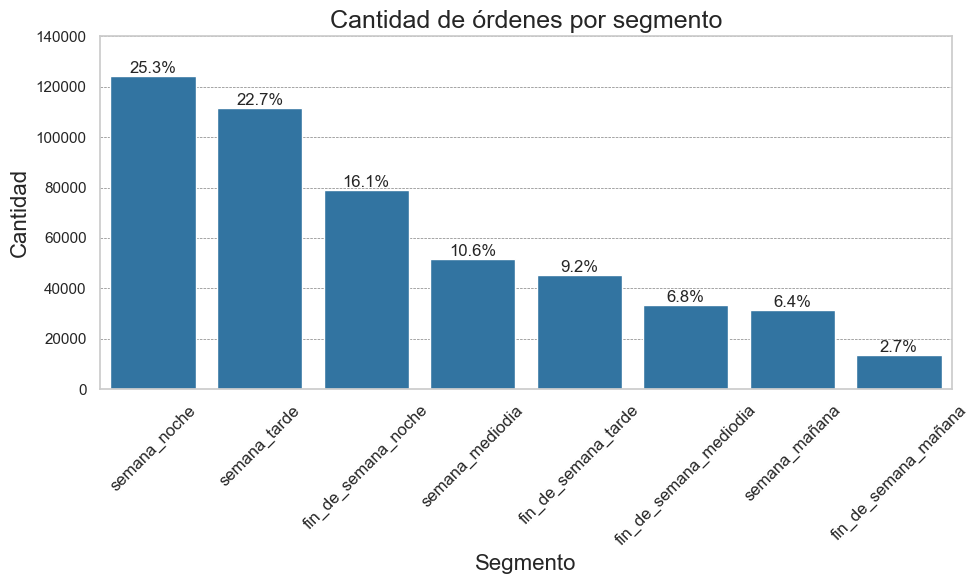

In [64]:
# Combinacion entre dia y hora

def get_time_block(hour):
    if 0 <= hour < 11:
        return 'mañana'
    elif 11 <= hour < 14:
        return 'mediodia'
    elif 14 <= hour < 19:
        return 'tarde'
    else:
        return 'noche'

ordenes_df_cluster['time_block'] = ordenes_df_cluster['hour'].apply(get_time_block)

def get_day_type(weekday, hour):
    if weekday == 'Friday' and hour >= 19:  # viernes noche
        return 'fin_de_semana'
    elif weekday in ['Saturday', 'Sunday']:  # sábado o domingo
        return 'fin_de_semana'
    elif weekday in ['Monday', 'Tuesday','Wednesday','Thursday','Friday']:  # lunes a viernes (incluye viernes antes de las 19)
        return 'semana'
    return None

ordenes_df_cluster['day_type'] = ordenes_df_cluster.apply(lambda row: get_day_type(row['weekday'], row['hour']), axis=1)

ordenes_valid = ordenes_df_cluster[ordenes_df_cluster['day_type'].notnull()].copy()
ordenes_valid['segmento'] = ordenes_valid['day_type'] + '_' + ordenes_valid['time_block']
ordenes_valid['value'] = 1

ordenes_segmento = ordenes_valid.pivot_table(
    index='order_id',
    columns='segmento',
    values='value',
    aggfunc='max',
    fill_value=0
).reset_index()

ordenes_df_cluster.drop(columns=['day_type','time_block'],inplace=True)
ordenes_df_cluster = ordenes_df_cluster.merge(ordenes_segmento,on='order_id')


# Calcular cantidad por segmento
segment_counts = ordenes_valid['segmento'].value_counts().sort_values(ascending=False)
segment_percentages = (segment_counts / segment_counts.sum()) * 100

# Crear el DataFrame para graficar
df_segment_plot = pd.DataFrame({
    'segmento': segment_counts.index,
    'cantidad': segment_counts.values,
    'porcentaje': segment_percentages.values
})

# Estética
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_context("notebook")

# Gráfico de barras
ax = sns.barplot(
    data=df_segment_plot,
    x='segmento',
    y='cantidad'
)

# Agregar porcentajes arriba de las barras
for i, row in df_segment_plot.iterrows():
    ax.text(i, row['cantidad'] + 5, f"{row['porcentaje']:.1f}%", ha='center', va='bottom', fontsize=12)

# Grilla horizontal solamente
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(False)

# Estética final
plt.title("Cantidad de órdenes por segmento", fontsize=18)
plt.ylabel("Cantidad", fontsize = 16)
plt.xlabel("Segmento", fontsize = 16)
plt.ylim(0,140000)
plt.xticks(rotation=45, fontsize = 12)
plt.tight_layout()
plt.show()

## week_sin y week_cos

Transforma la posición temporal de cada orden dentro de la semana en variables cíclicas (week_sin, week_cos) que permiten capturar patrones periódicos como hábitos de compra ligados al día y la hora, sin introducir discontinuidades artificiales entre días consecutivos (por ejemplo, domingo-lunes).

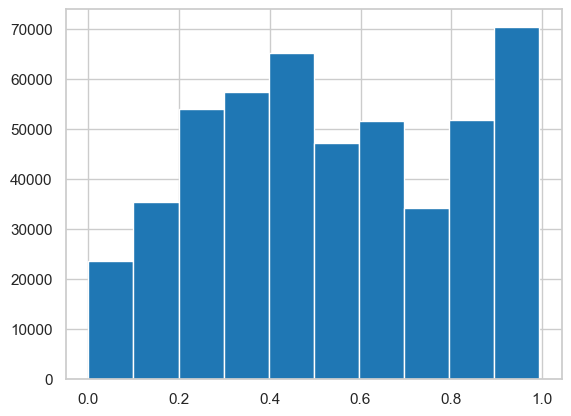

In [65]:
weekday_dicc = {'Monday':0,
                'Tuesday':1,
                'Wednesday':2,
                'Thursday':3,
                'Friday':4,
                'Saturday':5,
                'Sunday':6}

ordenes_df_cluster['weekday_num'] = ordenes_df_cluster['weekday'].map(weekday_dicc)

ordenes_df_cluster['week_pos'] = (ordenes_df_cluster['weekday_num'] + ordenes_df_cluster['hour']/24) / 7

ordenes_df_cluster['week_sin'] = np.sin(2 * np.pi * ordenes_df_cluster['week_pos'])
ordenes_df_cluster['week_cos'] = np.cos(2 * np.pi * ordenes_df_cluster['week_pos'])

ordenes_df_cluster.week_pos.hist()

ordenes_df_cluster.drop(columns = ['weekday_num','week_pos'],inplace=True)


## Coocurrencias de pares de productos en orden

Calcula, para cada orden, la suma total de coocurrencias históricas entre pares de productos comprados juntos. Esta variable mide cuánto se parecen los ítems dentro de una orden al comportamiento global de compras, útil para capturar patrones frecuentes o afinidad entre productos en procesos de clusterización o scoring.

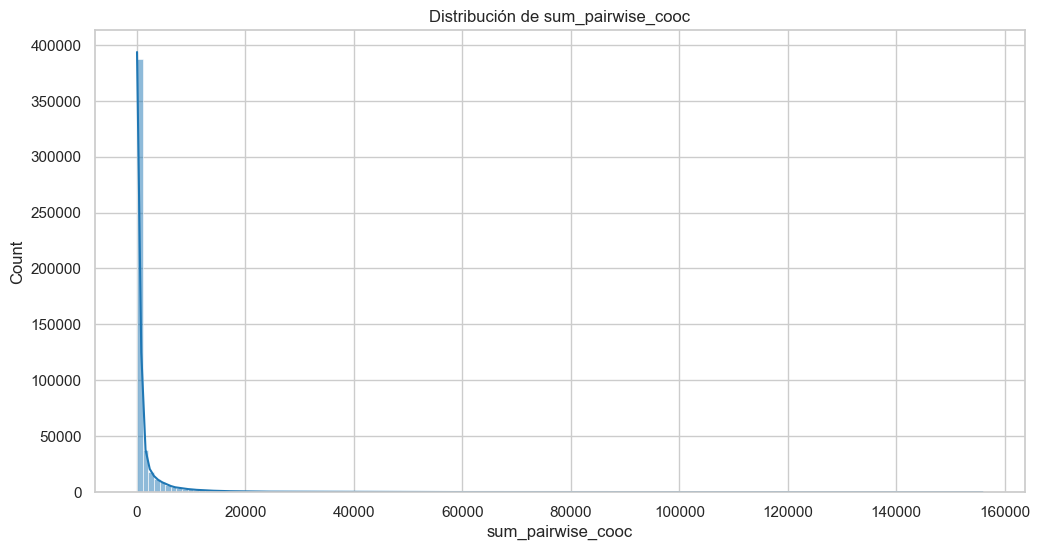

In [66]:
# Construyo el contador de coocurrencias globales
cooc_counter = Counter()

# Primero agrupo cada order_id en la lista de productos únicos
ordenes = (
    productos_ordenes_df
    .drop_duplicates(['order_id', 'product_name_hash'])
    .groupby('order_id')['product_name_hash']
    .agg(list)
)

# Recorro cada lista y voy llenando el contador
for prod_list in ordenes:
    # Ordeno los productos para garantizar el mismo orden de tupla
    for p1, p2 in combinations(sorted(prod_list), 2):
        cooc_counter[(p1, p2)] += 1

# Función que suma los conteos globales de cada par dentro de una orden
def sum_pairwise_cooc(prod_list, cooc_counter, threshold=None):
    total = 0
    for p1, p2 in combinations(sorted(prod_list), 2):
        cnt = cooc_counter.get((p1, p2), 0)
        if threshold is None or cnt > threshold:
            total += cnt
    return total

# Aplico la función a cada orden para generar la nueva variable
prod_por_orden_unicos = (
    productos_ordenes_df
    .drop_duplicates(['order_id', 'product_name_hash'])
    .groupby('order_id')['product_name_hash']
    .agg(list)
    .reset_index()
    .rename(columns={'product_name_hash': 'product_name_hash_list'})
)

prod_por_orden_unicos['sum_pairwise_cooc'] = (
    prod_por_orden_unicos['product_name_hash_list']
    .apply(lambda lst: sum_pairwise_cooc(lst, cooc_counter)))

plt.figure(figsize=(12,6))
sns.histplot(data=prod_por_orden_unicos, x='sum_pairwise_cooc', bins=150, kde=True)
plt.title('Distribución de sum_pairwise_cooc')
plt.show()


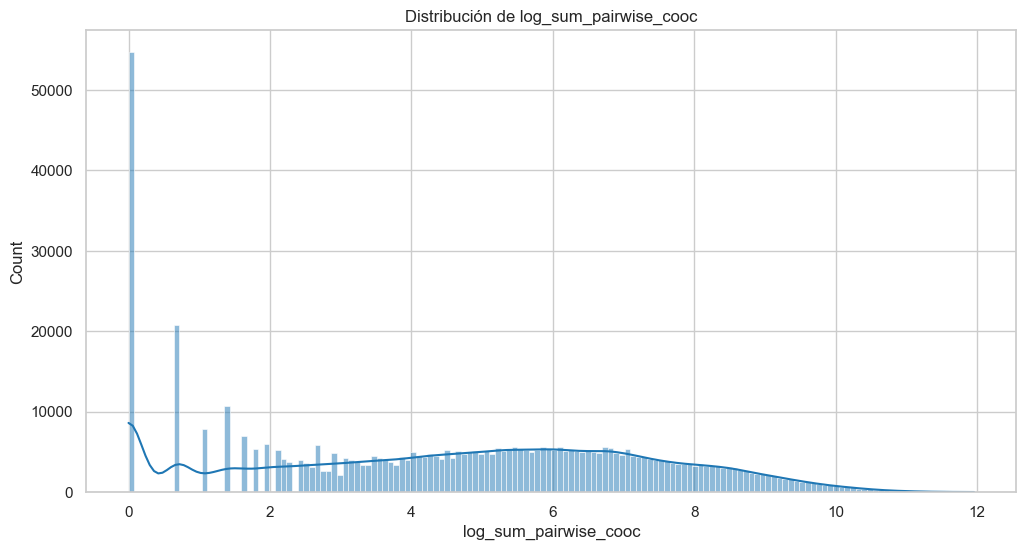

In [67]:
prod_por_orden_unicos['log_sum_pairwise_cooc'] = np.log1p(prod_por_orden_unicos['sum_pairwise_cooc'])

plt.figure(figsize=(12,6))
sns.histplot(data=prod_por_orden_unicos, x='log_sum_pairwise_cooc', bins=150, kde=True)
plt.title('Distribución de log_sum_pairwise_cooc')
plt.show()

ordenes_df_cluster = ordenes_df_cluster.merge(
    prod_por_orden_unicos[['order_id', 'log_sum_pairwise_cooc']],
    on='order_id',
    how='left'
)

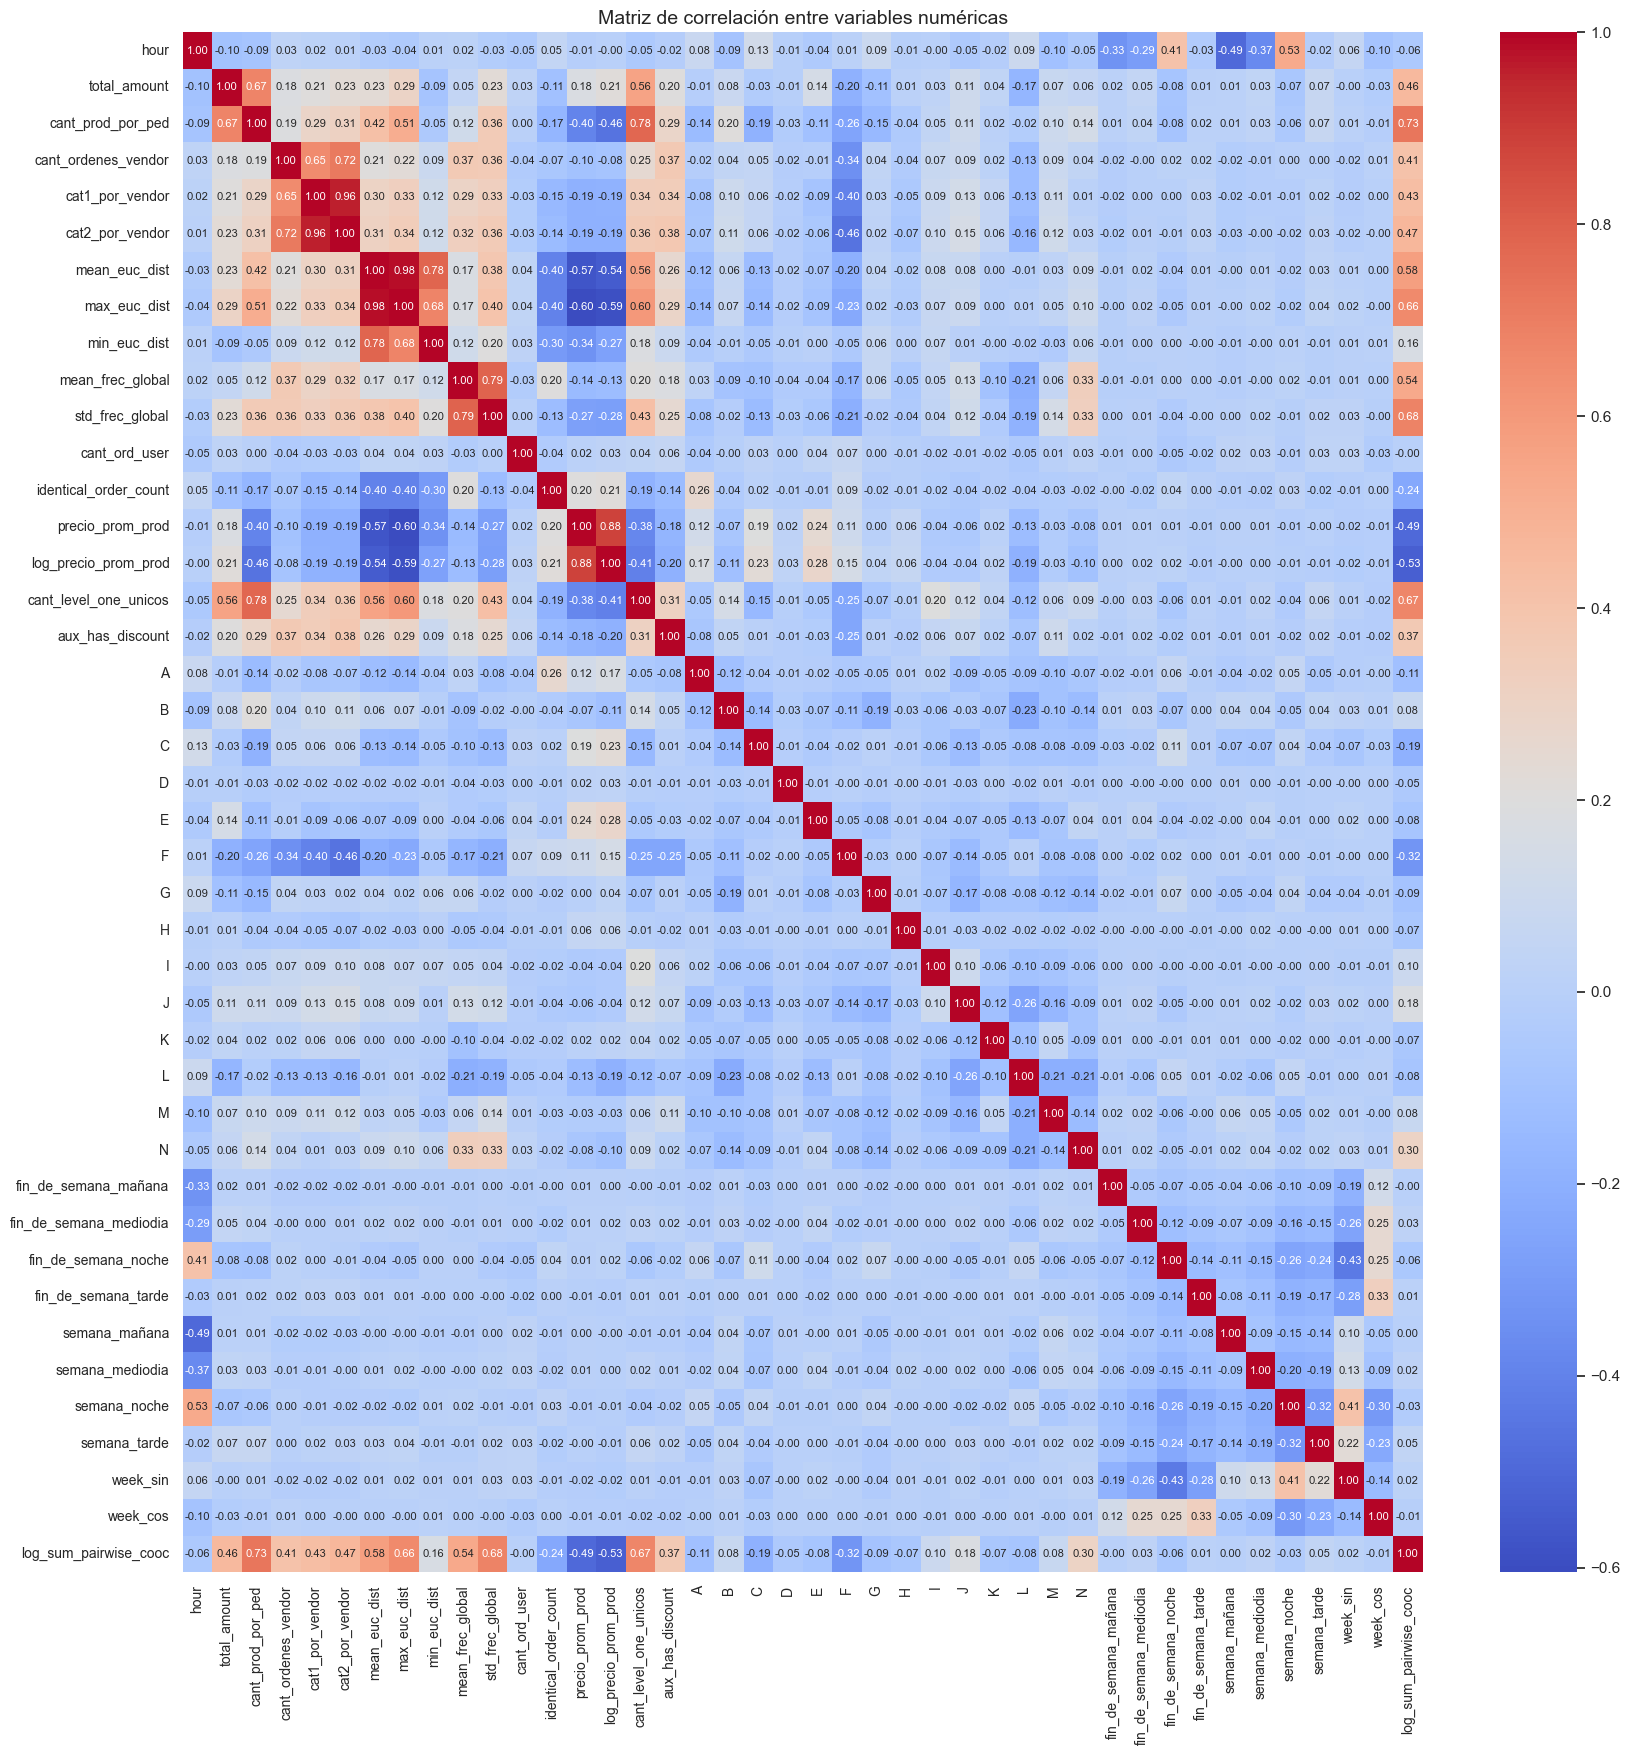

In [68]:
vars_a_excluir = ['order_id','user_id','vendor_id','has_discount','weekday']

plt.figure(figsize=(20, 20))
sns.heatmap(
    data=ordenes_df_cluster.drop(columns=vars_a_excluir).corr(),
    annot=True,
    annot_kws={"size": 8},  # tamaño de los valores dentro de las celdas
    fmt=".2f",
    cmap="coolwarm"  # opcional: mejora contraste
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.show()


In [69]:
ordenes_df_cluster.to_csv('tabla_para_clusterizacion.csv',index=False)